In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Librerías de gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook


In [3]:
pip install --upgrade pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade scikit-learn

In [5]:
# Cargar los cuatro archivos CSV en cuatro DataFrames diferentes

df2 = pd.read_csv('df_2t_2016.csv')

df6 = pd.read_csv('df_2t_2017.csv')

df10 = pd.read_csv('df_2t_2018.csv')

df14 = pd.read_csv('df_2t_2019.csv')


# Unir los DataFrames en uno solo
# Puedes elegir el método de unión (inner, outer, left, right) según tus necesidades
# En este caso, estoy usando concat para concatenar los DataFrames verticalmente (por filas)
df = pd.concat([df2,df6,df10,df14], axis=0, ignore_index=True)

# Mostrar el DataFrame resultante
print(df)


        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          2      407440  Potosi   Si  Hombre    25   
1          2016          2      407445  Potosi   Si   Mujer    59   
2          2016          2      407446  Potosi   Si  Hombre    22   
3          2016          2      407447  Potosi   Si   Mujer    27   
4          2016          2      407451  Potosi   Si  Hombre    32   
...         ...        ...         ...     ...  ...     ...   ...   
114679     2019          2     2574418  Tarija   Si   Mujer    50   
114680     2019          2     2574419  Tarija   Si   Mujer    27   
114681     2019          2     2574421  Tarija   Si  Hombre    30   
114682     2019          2     2574424  Tarija   Si   Mujer    36   
114683     2019          2     2574426  Tarija   Si  Hombre    41   

                         s1_05               Niv_Ed  \
0        JEFE O JEFA DEL HOGAR  Secundaria completa   
1        JEFE O JEFA DEL HOGAR  Primaria incompleta   
2     

In [6]:
df.dtypes

gestion                int64
trimestre              int64
id_persona             int64
depto                 object
peao                  object
Genero                object
Edad                   int64
s1_05                 object
Niv_Ed                object
Est_Civ               object
Nacionalidad           int64
ocupacion             object
Trabaja               object
Cont_Trab             object
condact               object
phrs                  object
Segundo_Trab          object
Aporta_Hog            object
tiempo_trab_meses      int64
ingresos             float64
pagos_extra           object
tasa_desempleo       float64
dtype: object

In [7]:
# Consulta para obtener los valores de tasa de desempleo por gestión
valores_tasa_desempleo = df.groupby('gestion')['tasa_desempleo'].unique()

# Imprimir los valores de tasa de desempleo por gestión
print(valores_tasa_desempleo)


gestion
2016     [4.140610545790934]
2017     [5.400270378895831]
2018     [4.624115462761858]
2019    [4.2522104001198855]
Name: tasa_desempleo, dtype: object


In [8]:
# Nuevos valores a reemplazar
nuevos_valores = {
    2016: 4.52,
    2017: 5.74,
    2018: 4.90,
    2019: 4.89
}

# Reemplazar los valores en la columna 'tasa_desempleo'
df['tasa_desempleo'] = df['gestion'].replace(nuevos_valores)

# Imprimir el DataFrame actualizado
print(df)

        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          2      407440  Potosi   Si  Hombre    25   
1          2016          2      407445  Potosi   Si   Mujer    59   
2          2016          2      407446  Potosi   Si  Hombre    22   
3          2016          2      407447  Potosi   Si   Mujer    27   
4          2016          2      407451  Potosi   Si  Hombre    32   
...         ...        ...         ...     ...  ...     ...   ...   
114679     2019          2     2574418  Tarija   Si   Mujer    50   
114680     2019          2     2574419  Tarija   Si   Mujer    27   
114681     2019          2     2574421  Tarija   Si  Hombre    30   
114682     2019          2     2574424  Tarija   Si   Mujer    36   
114683     2019          2     2574426  Tarija   Si  Hombre    41   

                         s1_05               Niv_Ed  \
0        JEFE O JEFA DEL HOGAR  Secundaria completa   
1        JEFE O JEFA DEL HOGAR  Primaria incompleta   
2     

In [9]:
df = df[df['s1_05'] != 'EMPLEADA/O DEL HOGAR CAMA ADENTRO']

In [10]:
valores_s1_05= df['s1_05'].unique()
print(valores_s1_05)

['JEFE O JEFA DEL HOGAR' 'ESPOSA/O O CONVIVIENTE' 'HIJO/A O ENTENADO/A'
 'HERMANO/A O CUÑADO/A' 'YERNO O NUERA' 'PADRES' 'OTRO PARIENTE'
 'NIETO/NIETA' 'SUEGROS' 'OTRO QUE NO ES PARIENTE'
 'PARIENTE DE LA EMPLEADA/O DEL HOGAR' 'HERMANO/A O CUÑDO/A']


In [11]:
df['s1_05'] = df['s1_05'].replace(['HERMANO/A O CUÑADO/A', 'HERMANO/A O CUï¿½DO', 'HERMANO/A O CUï¿½ADO', 'HERMANO/A O CUÑDO/A'], 'HERMANO/A O CUÑADO/A')
df['s1_05'] = df['s1_05'].replace(['PARIENTE DE LA EMPLEADA/O DEL HOGAR' ], 'OTRO QUE NO ES PARIENTE')
df['s1_05'] = df['s1_05'].replace(['PADRES', 'SUEGROS'], 'PADRES/SUEGROS')

In [12]:
valores_ocupacion= df['ocupacion'].unique()
print(valores_ocupacion)

['Operadores de Instalaciones y Maquinarias'
 'Trabajadores de Servicio y Vendedores'
 'Trabajadores de la Construcción, Ind. Manufacturera y Otros'
 'Profesionales cientificos e intelectuales' 'Sin ocupacion'
 'Técnicos de Nivel Medio' 'Trabajadores No Calificados'
 'Directivos Adm. Pública y Empresas' 'Empleados de oficina'
 'Trabajadores en Agricultura, Pecuaria, Pesca y otros'
 'Otro (Especifique)' 'Fuerzas Armadas' 'Estudiante' 'Sin especificar'
 'Ama de casa/ responsable de los quehaceres del hogar'
 'Trabajadores en Agricultura, Pecuaria,Pesca y otros']


In [13]:
df = df[~df['ocupacion'].isin(['Ama de casa/ responsable de los quehaceres del hogar', 'Estudiante', 'Persona de edad avanzada'])]

In [14]:
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores de la Construcciï¿½n, Ind. Manufacturera y Otr'], 'Trabajadores de la Construcción, Ind. Manufacturera y Otros')
df['ocupacion'] = df['ocupacion'].replace(['Jubilado / Benemï¿½ri'], 'Jubilado / Benemérito')
df['ocupacion'] = df['ocupacion'].replace(['Tï¿½cnicos de Nivel Med'], 'Técnicos de Nivel Medio')
df['ocupacion'] = df['ocupacion'].replace(['Directivos Adm. Pï¿½blica y Empres'], 'Directivos Adm. Pública y Empresas')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores en Agricultura, Pecuaria, Pesca y otros'], 'Trabajadores en Agricultura, Pecuaria,Pesca y otros')
df['ocupacion'] = df['ocupacion'].replace(['Trabajadores No Calificados', 'Otro (Especifique)','Técnicos de Nivel Medio','Sin especificar'], 'Otro')


In [15]:
valores_Est_civ= df['Est_Civ'].unique()
print(valores_Est_civ)

['CONVIVIENTE O CONCUBINO/A' 'SEPARADO/A' 'CASADO/A' 'SOLTERO/A' 'VIUDO/A'
 'DIVORCIADO/A']


In [16]:
df['Est_Civ'] = df['Est_Civ'].replace(['CONVIVIENTE O CONCUBINO/A'], 'CASADO/A')
df['Est_Civ'] = df['Est_Civ'].replace(['DIVORCIADO/A'], 'SEPARADO/A')

In [17]:
valores_Segundo_Trab= df['Segundo_Trab'].unique()
print(valores_Segundo_Trab)

['No' 'Si']


In [18]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [19]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

[0 1]


In [20]:
import numpy as np

# Diccionario de mapeo actualizado para incluir 0, 1 y espacio en blanco
nacionalidad_mapping = {'0': 'Boliviano/a', '1': 'Extranjero/a', 0: 'Boliviano/a', 1: 'Extranjero/a', ' ': np.nan}

# Aplicar el mapeo a la columna nacionalidad
df['Nacionalidad'] = df['Nacionalidad'].map(nacionalidad_mapping)

# Eliminar filas donde la nacionalidad es nula
df = df.dropna(subset=['Nacionalidad'])

In [21]:
valores_Nacionalidad= df['Nacionalidad'].unique()
print(valores_Nacionalidad)

['Boliviano/a' 'Extranjero/a']


In [22]:
df['Segundo_Trab'] = df['Segundo_Trab'].replace(['Sï'], 'Si')

In [23]:
valores_Niv_Ed= df['Niv_Ed'].unique()
print(valores_Niv_Ed)

['Secundaria completa' 'Primaria incompleta' 'Primaria completa'
 'Superior' 'Secundaria incompleta' 'Ninguno' 'Otros' 'Sin especificar'
 ' ']


In [24]:
df = df[(df['Niv_Ed'].str.strip() != '') & (df['Niv_Ed'] != 'Otros')]

In [25]:
valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

[  242 12010    66 ...   452    50    46]


In [26]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [27]:
valores_peao= df['peao'].unique()
print(valores_peao)

['Si' 'No']


In [28]:
df.shape

(113605, 22)

In [29]:
# Convertir 'phrs' a tipo string
df['phrs'] = df['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df['phrs'] = df['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df['phrs'] = pd.to_numeric(df['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df['ingresos'] = df['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df['ingresos'] = df['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df['tiempo_trab_meses'] = pd.to_numeric(df['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df)



        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          2      407440  Potosi   Si  Hombre    25   
1          2016          2      407445  Potosi   Si   Mujer    59   
2          2016          2      407446  Potosi   Si  Hombre    22   
3          2016          2      407447  Potosi   Si   Mujer    27   
4          2016          2      407451  Potosi   Si  Hombre    32   
...         ...        ...         ...     ...  ...     ...   ...   
114679     2019          2     2574418  Tarija   Si   Mujer    50   
114680     2019          2     2574419  Tarija   Si   Mujer    27   
114681     2019          2     2574421  Tarija   Si  Hombre    30   
114682     2019          2     2574424  Tarija   Si   Mujer    36   
114683     2019          2     2574426  Tarija   Si  Hombre    41   

                         s1_05               Niv_Ed     Est_Civ  ... Trabaja  \
0        JEFE O JEFA DEL HOGAR  Secundaria completa    CASADO/A  ...      Si   
1        JE

In [30]:
valores_phrs= df['phrs'].unique()
print(valores_phrs)

valores_tiempo_trab_meses= df['tiempo_trab_meses'].unique()
print(valores_tiempo_trab_meses)

valores_ingresos= df['ingresos'].unique()
print(valores_ingresos)

[ 65.     40.     38.5    15.     48.     24.     56.     60.     45.
   0.    105.      6.     78.     44.     84.     28.     30.     54.
  32.     26.     16.     10.     49.5    77.     36.     20.      8.
  12.     50.     14.     70.     33.     42.     66.     35.     25.
  72.    112.     91.     10.5    63.     17.5    71.5    18.     55.
  16.5     2.     27.     17.     52.     98.     90.      9.     49.
  21.     27.5    58.5    96.     51.      4.     22.     64.     42.5
  80.5     3.      7.     22.5    13.     32.5     1.     66.5    80.
   5.     42.25   25.5    46.75   60.5    12.5    73.5    59.5     7.5
  45.5    11.     39.     75.     68.75   24.75    6.5    13.5    69.
 108.     57.     23.75   38.      3.5    40.5     8.5    87.    102.
  47.5   101.5    57.75   94.5    93.5     4.5    31.5    68.     82.5
  37.5    41.25   12.25   87.5    88.     52.25   21.25   62.5    95.
   5.5   104.     52.5    28.5    55.5    30.25   92.      2.5    97.5
  26.25   11.25 

In [31]:
df.info

<bound method DataFrame.info of         gestion  trimestre  id_persona   depto peao  Genero  Edad  \
0          2016          2      407440  Potosi   Si  Hombre    25   
1          2016          2      407445  Potosi   Si   Mujer    59   
2          2016          2      407446  Potosi   Si  Hombre    22   
3          2016          2      407447  Potosi   Si   Mujer    27   
4          2016          2      407451  Potosi   Si  Hombre    32   
...         ...        ...         ...     ...  ...     ...   ...   
114679     2019          2     2574418  Tarija   Si   Mujer    50   
114680     2019          2     2574419  Tarija   Si   Mujer    27   
114681     2019          2     2574421  Tarija   Si  Hombre    30   
114682     2019          2     2574424  Tarija   Si   Mujer    36   
114683     2019          2     2574426  Tarija   Si  Hombre    41   

                         s1_05               Niv_Ed     Est_Civ  ... Trabaja  \
0        JEFE O JEFA DEL HOGAR  Secundaria completa    CASA

In [32]:
# Eliminar filas donde 'ingresos' es inferior a o superior a 15000 (sin incluir el valor 0)
df = df[((df['ingresos'] == 0) | ((df['ingresos'] > 0) & (df['ingresos'] >= 1996) & (df['ingresos'] <= 15000)))]

# Eliminar filas donde el valor es mayor a 300 incluir el valor 0)
df = df[(df['tiempo_trab_meses'].notnull()) & (df['tiempo_trab_meses'] >= 0) & (df['tiempo_trab_meses'] <= 300)]

In [33]:
df.shape

(38961, 22)

In [34]:
# Definir los límites para la categorización de ingresos
ingresos_bins = [-float('inf'), 1, 3000, 7000, float('inf')]
ingresos_labels = ['Sin ingresos', 'Bajo', 'Medio', 'Alto']

# Categorizar ingresos
df['ingresos_categoria'] = pd.cut(df['ingresos'], bins=ingresos_bins, labels=ingresos_labels, right=False)

# Definir los límites para la categorización de tiempo trabajado
tiempo_trab_bins = [-float('inf'), 1, 24, 96, float('inf')]
tiempo_trab_labels = ['Sin experiencia', 'Corto', 'Medio', 'Largo']

# Categorizar tiempo trabajado
df['tiempo_trab_categoria'] = pd.cut(df['tiempo_trab_meses'], bins=tiempo_trab_bins, labels=tiempo_trab_labels, right=False)

# Definir los límites para la categorización de phrs
phrs_bins = [-float('inf'), 0, 40, 50, float('inf')]
phrs_labels = ['Sin horas', 'Parcial', 'Completo', 'Extra']

# Categorizar 'phrs' y crear la nueva columna 'phrs_categoria'
df['phrs_categoria'] = pd.cut(df['phrs'], bins=phrs_bins, labels=phrs_labels, right=False)

# Asignar la categoría 'Sin horas' a las filas donde 'phrs' es nulo
df.loc[df['phrs']== 0, 'phrs_categoria'] = 'Sin horas'

df.head()


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
9,2016,2,407473,Potosi,Si,Hombre,23,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Extra
12,2016,2,407481,Potosi,No,Mujer,21,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,0.0,No,No,0,0.0,No,4.52,Sin ingresos,Sin experiencia,Sin horas
27,2016,2,407536,Oruro,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,121,3000.0,No,4.52,Medio,Largo,Extra
31,2016,2,407546,Oruro,Si,Mujer,23,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,16.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Parcial
33,2016,2,407550,Oruro,Si,Mujer,34,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,10.0,No,Si,121,2100.0,No,4.52,Bajo,Largo,Parcial


In [35]:
# Contar el número de casos en cada categoría para 'ingresos_categoria'
conteo_ingresos = df['ingresos_categoria'].value_counts()

# Mostrar los resultados para 'ingresos_categoria'
print("Conteo de casos para 'ingresos_categoria':")
print(conteo_ingresos)
print()

# Contar el número de casos en cada categoría para 'tiempo_trab_categoria'
conteo_tiempo_trab = df['tiempo_trab_categoria'].value_counts()

# Mostrar los resultados para 'tiempo_trab_categoria'
print("Conteo de casos para 'tiempo_trab_categoria':")
print(conteo_tiempo_trab)
print()

# Contar el número de casos en cada categoría para 'phrs_categoria'
conteo_phrs = df['phrs_categoria'].value_counts()

# Mostrar los resultados para 'phrs_categoria'
print("Conteo de casos para 'phrs_categoria':")
print(conteo_phrs)

Conteo de casos para 'ingresos_categoria':
ingresos_categoria
Medio           14238
Sin ingresos    11829
Bajo            11266
Alto             1628
Name: count, dtype: int64

Conteo de casos para 'tiempo_trab_categoria':
tiempo_trab_categoria
Largo              14332
Medio              11405
Corto               8093
Sin experiencia     5131
Name: count, dtype: int64

Conteo de casos para 'phrs_categoria':
phrs_categoria
Completo     15339
Parcial      11026
Extra         7590
Sin horas     5006
Name: count, dtype: int64


In [36]:
valores_ingresos_categoria= df['ingresos_categoria'].unique()
print(valores_ingresos_categoria)

['Medio', 'Sin ingresos', 'Bajo', 'Alto']
Categories (4, object): ['Sin ingresos' < 'Bajo' < 'Medio' < 'Alto']


In [37]:
valores_tiempo_trab_categoria= df['tiempo_trab_categoria'].unique()
print(valores_tiempo_trab_categoria)

['Largo', 'Sin experiencia', 'Corto', 'Medio']
Categories (4, object): ['Sin experiencia' < 'Corto' < 'Medio' < 'Largo']


In [38]:
# Reemplaza los ceros con valores nulos (NaN) en las columnas 
df['phrs'] = df['phrs'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna ingresos
df['ingresos'] = df['ingresos'].replace(0, pd.NA)

# Reemplaza los ceros con valores nulos (NaN) en las columna tiempo_trab_meses
df['tiempo_trab_meses'] = df['tiempo_trab_meses'].replace(0, pd.NA)


df.head()

,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
9,2016,2,407473,Potosi,Si,Hombre,23,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Extra
12,2016,2,407481,Potosi,No,Mujer,21,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,<NA>,No,No,<NA>,<NA>,No,4.52,Sin ingresos,Sin experiencia,Sin horas
27,2016,2,407536,Oruro,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,121,3000.0,No,4.52,Medio,Largo,Extra
31,2016,2,407546,Oruro,Si,Mujer,23,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,16.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Parcial
33,2016,2,407550,Oruro,Si,Mujer,34,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,10.0,No,Si,121,2100.0,No,4.52,Bajo,Largo,Parcial


In [39]:
limite_inferior_ingresos = df['ingresos'].min()
limite_superior_ingresos = df['ingresos'].max()

limite_inferior_tiempo_trab_meses = df['tiempo_trab_meses'].min()
limite_superior_tiempo_trab_meses = df['tiempo_trab_meses'].max()

print("Límite inferior de ingresos:", limite_inferior_ingresos)
print("Límite superior de ingresos:", limite_superior_ingresos)

print("Límite inferior de tiempo_trab_meses:", limite_inferior_tiempo_trab_meses)
print("Límite superior de tiempo_trab_meses:", limite_superior_tiempo_trab_meses)


Límite inferior de ingresos: 1996.0
Límite superior de ingresos: 15000.0
Límite inferior de tiempo_trab_meses: 1
Límite superior de tiempo_trab_meses: 300


## Tratamiento de valores atipicos por el metodo del rango intercuartil

Tratamiento de valores atípicos  para la columna phrs, ingresos y tiempo_trab_meses

Existen valores atipicos que fueron borrados por el procedimiento

Eliminación por rango intercuartileo

IQR = Q3 - Q1

LI = Q1 - 1.5 * (IQR)

LS = Q3 + 1.5 * (IQR)

In [40]:
df.shape

(38961, 25)

In [41]:
import pandas as pd

# Supongamos que 'phrs' es la columna que quieres convertir y filtrar
columna_a_corregir = 'phrs'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1 = df['phrs'].quantile(q=0.25)
Q3 = df['phrs'].quantile(q=0.75)
IQR = Q3 - Q1

# Filtrar filas basadas en el rango intercuartílico
df_1 = df[~((df['phrs'] < (Q1 - 1.5 * IQR)) | (df['phrs'] > (Q3 + 1.5 * IQR)))].copy()



In [42]:
df_1.shape

(38084, 25)

In [43]:
columna_a_corregir_ingresos = 'tiempo_trab_meses'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['tiempo_trab_meses'].quantile(q=0.25)
Q3_ingresos = df['tiempo_trab_meses'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['tiempo_trab_meses'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['tiempo_trab_meses'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [44]:
df_1.shape

(37652, 25)

In [45]:
columna_a_corregir_ingresos = 'ingresos'


# Calcular los cuantiles y el rango intercuartílico (IQR)
Q1_ingresos = df['ingresos'].quantile(q=0.25)
Q3_ingresos = df['ingresos'].quantile(q=0.75)
IQR_ingresos = Q3_ingresos - Q1_ingresos

# Filtrar filas basadas en el rango intercuartílico para 'ingresos'
df_1= df_1[~((df_1['ingresos'] < (Q1_ingresos - 1.5 * IQR_ingresos)) | (df_1['ingresos'] > (Q3_ingresos + 1.5 * IQR_ingresos)))].copy()

In [46]:
df_1.shape

(35951, 25)

In [47]:
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35951 entries, 9 to 114683
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                35951 non-null  int64   
 1   trimestre              35951 non-null  int64   
 2   id_persona             35951 non-null  int64   
 3   depto                  35951 non-null  object  
 4   peao                   35951 non-null  object  
 5   Genero                 35951 non-null  object  
 6   Edad                   35951 non-null  int64   
 7   s1_05                  35951 non-null  object  
 8   Niv_Ed                 35951 non-null  object  
 9   Est_Civ                35951 non-null  object  
 10  Nacionalidad           35951 non-null  object  
 11  ocupacion              35951 non-null  object  
 12  Trabaja                35951 non-null  object  
 13  Cont_Trab              35951 non-null  object  
 14  condact                35951 non-null  obj

In [48]:
import numpy as np

# Eliminar registros donde la edad es menor que el tiempo de trabajo en años y el tiempo de trabajo en años no es cero ni nulo
df_1 = df_1[(
    (df_1['Edad'] >= np.where(pd.isna(df_1['tiempo_trab_meses']), np.nan, df_1['tiempo_trab_meses'] / 12)) |
    (df_1['tiempo_trab_meses'].isna())
)]

# Mostrar las primeras filas del DataFrame resultante
df_1.head()



C:\Users\win10\anaconda3\jupyter\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


,gestion,trimestre,id_persona,depto,peao,Genero,Edad,s1_05,Niv_Ed,Est_Civ,...,phrs,Segundo_Trab,Aporta_Hog,tiempo_trab_meses,ingresos,pagos_extra,tasa_desempleo,ingresos_categoria,tiempo_trab_categoria,phrs_categoria
9,2016,2,407473,Potosi,Si,Hombre,23,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Extra
12,2016,2,407481,Potosi,No,Mujer,21,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,<NA>,No,No,<NA>,<NA>,No,4.52,Sin ingresos,Sin experiencia,Sin horas
27,2016,2,407536,Oruro,Si,Hombre,22,JEFE O JEFA DEL HOGAR,Secundaria incompleta,CASADO/A,...,60.0,No,Si,121,3000.0,No,4.52,Medio,Largo,Extra
31,2016,2,407546,Oruro,Si,Mujer,23,ESPOSA/O O CONVIVIENTE,Secundaria incompleta,CASADO/A,...,16.0,No,Si,242,3000.0,No,4.52,Medio,Largo,Parcial
33,2016,2,407550,Oruro,Si,Mujer,34,ESPOSA/O O CONVIVIENTE,Secundaria completa,CASADO/A,...,10.0,No,Si,121,2100.0,No,4.52,Bajo,Largo,Parcial


In [49]:
df_1['peao'].value_counts()

peao
Si    30192
No     5004
Name: count, dtype: int64

In [50]:
df_1.shape

(35196, 25)

In [51]:
# Convertir 'phrs' a tipo string
df_1['phrs'] = df_1['phrs'].astype(str)

# Reemplazar comas por puntos en la columna 'phrs'
df_1['phrs'] = df_1['phrs'].str.replace(',', '.')

# Convertir 'phrs' a tipo numérico
df_1['phrs'] = pd.to_numeric(df_1['phrs'], errors='coerce')

# Convertir 'ingresos' a tipo string
df_1['ingresos'] = df_1['ingresos'].astype(str)

# Reemplazar comas por puntos en la columna 'ingresos'
df_1['ingresos'] = df_1['ingresos'].str.replace(',', '.')

# Convertir 'ingresos' a tipo numérico
df_1['ingresos'] = pd.to_numeric(df_1['ingresos'], errors='coerce')

# Convertir 'tiempo_trab_meses' a tipo string
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].astype(str)

# Reemplazar comas por puntos en la columna 'tiempo_trab_meses'
df_1['tiempo_trab_meses'] = df_1['tiempo_trab_meses'].str.replace(',', '.')

# Convertir 'tiempo_trab_meses' a tipo numérico
df_1['tiempo_trab_meses'] = pd.to_numeric(df_1['tiempo_trab_meses'], errors='coerce')

# Imprimir el DataFrame después de las conversiones
print(df_1)


        gestion  trimestre  id_persona   depto peao  Genero  Edad  \
9          2016          2      407473  Potosi   Si  Hombre    23   
12         2016          2      407481  Potosi   No   Mujer    21   
27         2016          2      407536   Oruro   Si  Hombre    22   
31         2016          2      407546   Oruro   Si   Mujer    23   
33         2016          2      407550   Oruro   Si   Mujer    34   
...         ...        ...         ...     ...  ...     ...   ...   
114676     2019          2     2574411  La Paz   Si  Hombre    25   
114680     2019          2     2574419  Tarija   Si   Mujer    27   
114681     2019          2     2574421  Tarija   Si  Hombre    30   
114682     2019          2     2574424  Tarija   Si   Mujer    36   
114683     2019          2     2574426  Tarija   Si  Hombre    41   

                         s1_05                 Niv_Ed    Est_Civ  ...  phrs  \
9        JEFE O JEFA DEL HOGAR  Secundaria incompleta   CASADO/A  ...  60.0   
12      ESPOS

In [52]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].isna() & df_1['phrs'].notna())]

In [53]:
df_1.shape

(35080, 25)

In [54]:
# Eliminar filas donde 'tiempo_trab_meses' está vacío pero 'phrs' tiene contenido
df_1 = df_1[~(df_1['tiempo_trab_meses'].notna() &df_1['tiempo_trab_meses'].notna() & df_1['phrs'].isna())]

In [55]:
df_1.shape

(35079, 25)

In [56]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['tiempo_trab_categoria'].isin(['Largo','Medio', 'Corto'])))]

In [57]:
# Filtrar las filas
df_1 = df_1[~((df_1['ingresos'].isna()) & 
             (df_1['phrs_categoria'].isin(['Completo', 'Extra', 'Parcial'])))]

In [58]:
# Guardar el DataFrame en un archivo CSV
df_1.to_csv('df_2t.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [59]:
df_1.shape

(29082, 25)

# Analisis descriptivo
Variables numéricas
  

In [60]:
df_1.describe()

,gestion,trimestre,id_persona,Edad,phrs,tiempo_trab_meses,ingresos,tasa_desempleo
count,29082.000000,29082.0,2.908200e+04,29082.000000,24077.000000,24077.000000,24077.000000,29082.000000
mean,2017.881886,2.0,1.752679e+06,34.852520,43.327486,89.191884,3215.826176,4.989839
std,1.143097,0.0,7.589658e+05,11.800877,13.479657,81.604759,1049.443632,0.390601
min,2016.000000,2.0,4.074730e+05,14.000000,3.000000,1.000000,1996.000000,4.520000
25%,2017.000000,2.0,1.166246e+06,26.000000,40.000000,22.000000,2400.000000,4.890000
50%,2018.000000,2.0,1.862269e+06,33.000000,44.000000,60.000000,3000.000000,4.890000
75%,2019.000000,2.0,2.473938e+06,42.000000,48.000000,121.000000,3800.000000,4.900000
max,2019.000000,2.0,2.574426e+06,91.000000,75.000000,264.000000,6400.000000,5.740000


In [61]:
# Crea una lista de las variables numéricas
variables_numericas = ['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs', 'tasa_desempleo']

# Crea un DataFrame vacío para almacenar las estadísticas descriptivas
df_estadisticas = pd.DataFrame(columns=['Variable', 'Moda', 'Mediana', 'Media', 'Desviación estándar', 'Varianza', 'Coeficiente de variabilidad'])

# Calcula las estadísticas descriptivas para cada variable
for variable in variables_numericas:
    # Calcula la moda
    moda = df_1[variable].mode().iloc[0]

    # Calcula la mediana
    mediana = df_1[variable].median()

    # Calcula la media
    media = df_1[variable].mean()

    # Calcula la desviación estándar
    desviacion_estandar = df_1[variable].std()

    # Calcula la varianza
    varianza = desviacion_estandar**2

    # Calcula el coeficiente de variabilidad
    coef_variabilidad = (desviacion_estandar / media) * 100

    # Agrega las estadísticas a la tabla
    df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({
        'Variable': [variable],
        'Moda': [moda],
        'Mediana': [mediana],
        'Media': [media],
        'Desviación estándar': [desviacion_estandar],
        'Varianza': [varianza],
        'Coeficiente de variabilidad': [coef_variabilidad]
    })], ignore_index=True)

# Imprime la tabla
print(df_estadisticas.to_string(index=False))


         Variable    Moda  Mediana       Media  Desviación estándar     Varianza  Coeficiente de variabilidad
             Edad      25    33.00   34.852520            11.800877 1.392607e+02                    33.859466
tiempo_trab_meses   242.0    60.00   89.191884            81.604759 6.659337e+03                    91.493480
         ingresos  3000.0  3000.00 3215.826176          1049.443632 1.101332e+06                    32.633718
             phrs    48.0    44.00   43.327486            13.479657 1.817012e+02                    31.111100
   tasa_desempleo    4.89     4.89    4.989839             0.390601 1.525692e-01                     7.827930


C:\Users\win10\AppData\Local\Temp\ipykernel_9372\1069559067.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_estadisticas = pd.concat([df_estadisticas, pd.DataFrame({


<IPython.core.display.Javascript object>


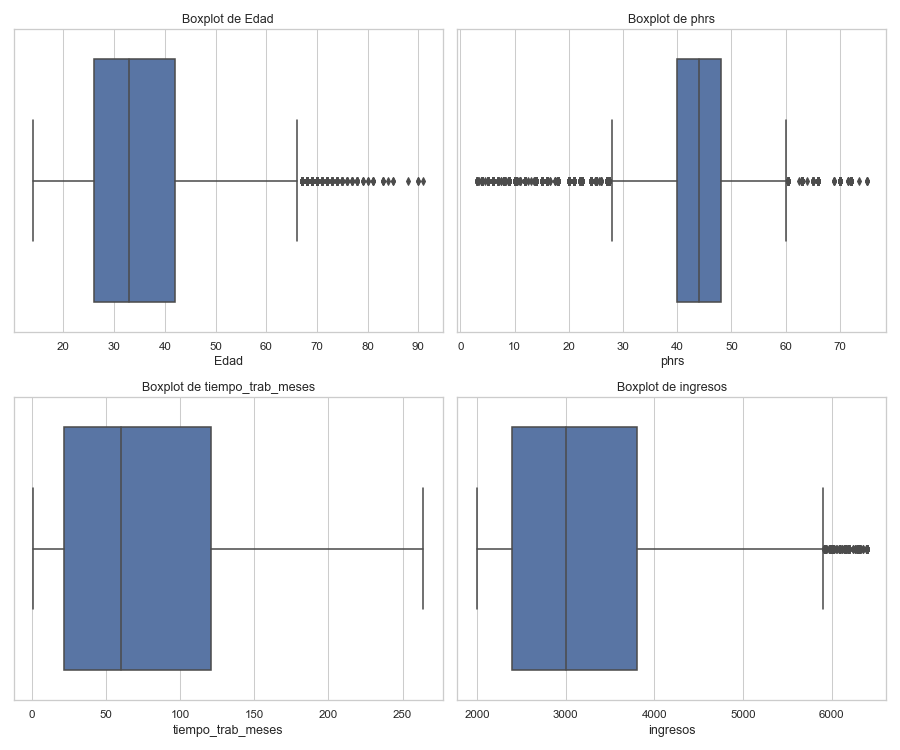

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Variables a incluir en los boxplots
variables_boxplot = ['Edad', 'phrs', 'tiempo_trab_meses', 'ingresos']

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterar sobre las variables y dibujar boxplots
for i, variable in enumerate(variables_boxplot):
    sns.boxplot(x=df_1[variable], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {variable}')

# Ajustes de diseño
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


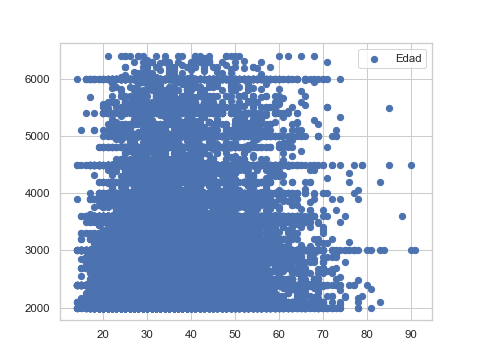

0.13445335640312564


In [63]:
# Crea un gráfico de dispersión
plt.figure()
plt.scatter(df_1['Edad'], df_1['ingresos'])

# Agrega una leyenda
plt.legend(['Edad', 'Ingresos'])

# Muestra el gráfico
plt.show()

# Copia el DataFrame para preservar el original
df_1_copia = df_1.copy()

# Elimina las filas con valores nulos en las columnas 'Edad' e 'Ingresos'
df_1_sin_nulos = df_1_copia.dropna(subset=['Edad', 'ingresos'])

# Calcula la correlación lineal
correlacion = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['ingresos'])[0, 1]
print(correlacion)



<IPython.core.display.Javascript object>


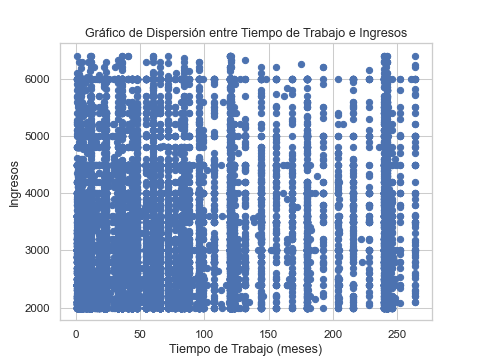

Correlación entre Tiempo de Trabajo e Ingresos: 0.0833975691781244


In [64]:
plt.figure()
plt.scatter(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])
plt.xlabel('Tiempo de Trabajo (meses)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre Tiempo de Trabajo e Ingresos')
plt.show()

correlacion_tt_ingresos = np.corrcoef(df_1_sin_nulos['tiempo_trab_meses'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre Tiempo de Trabajo e Ingresos:", correlacion_tt_ingresos)


<IPython.core.display.Javascript object>


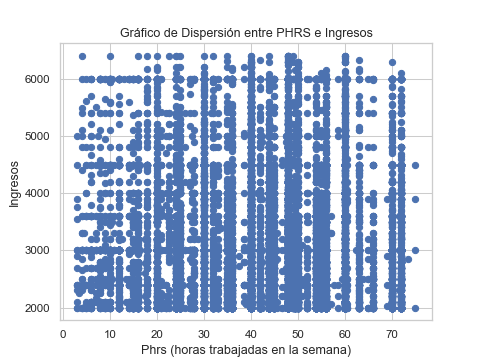

Correlación entre PHRS e Ingresos: -0.012051073453616196


In [65]:
plt.figure()
plt.scatter(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])
plt.xlabel('Phrs (horas trabajadas en la semana)')
plt.ylabel('Ingresos')
plt.title('Gráfico de Dispersión entre PHRS e Ingresos')
plt.show()

correlacion_phrs_ingresos = np.corrcoef(df_1_sin_nulos['phrs'], df_1_sin_nulos['ingresos'])[0, 1]
print("Correlación entre PHRS e Ingresos:", correlacion_phrs_ingresos)


<IPython.core.display.Javascript object>


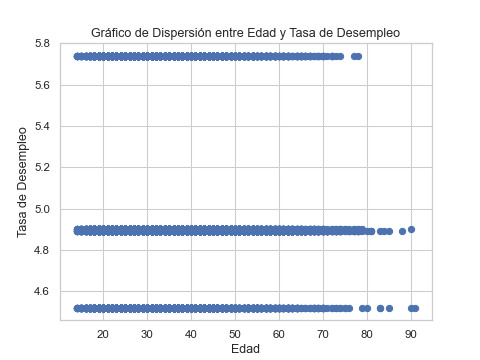

Correlación entre Edad y Tasa de Desempleo: -0.03418818940024037


In [66]:
plt.figure()
plt.scatter(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])
plt.xlabel('Edad')
plt.ylabel('Tasa de Desempleo')
plt.title('Gráfico de Dispersión entre Edad y Tasa de Desempleo')
plt.show()

correlacion_edad_tasa_desempleo = np.corrcoef(df_1_sin_nulos['Edad'], df_1_sin_nulos['tasa_desempleo'])[0, 1]
print("Correlación entre Edad y Tasa de Desempleo:", correlacion_edad_tasa_desempleo)


<IPython.core.display.Javascript object>


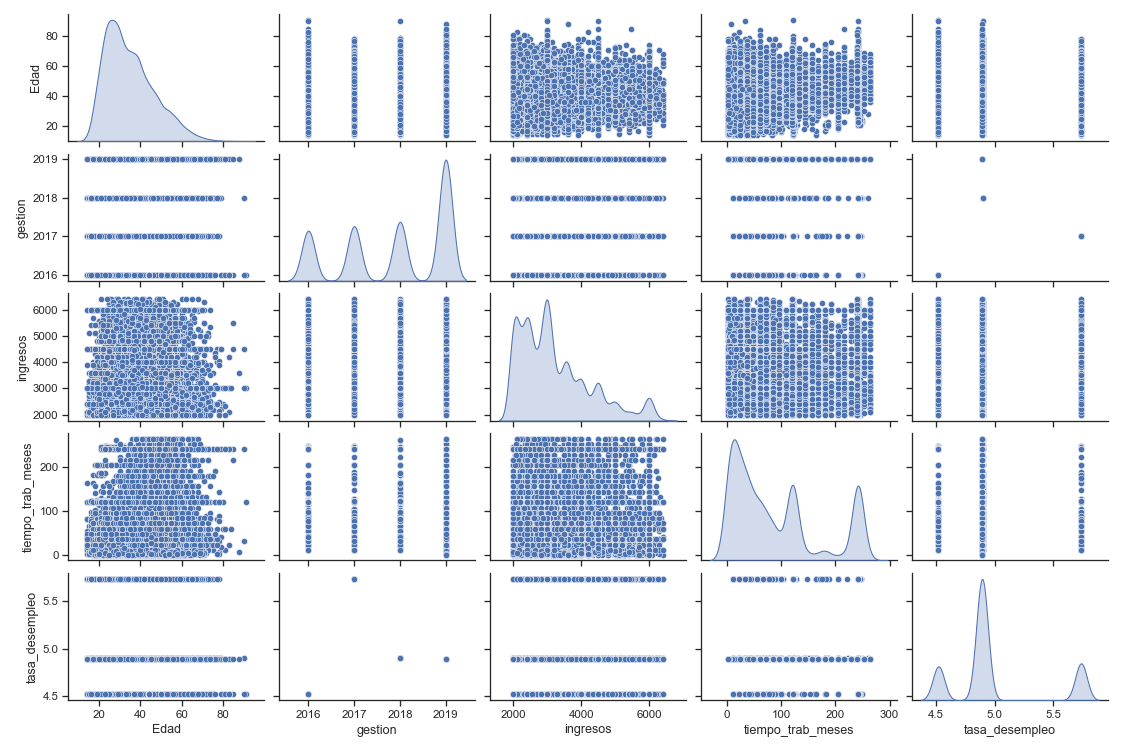

C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\win10\anaconda3\jupyter\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las columnas relevantes del DataFrame
columns_to_plot = ['Edad', 'gestion', 'ingresos', 'tiempo_trab_meses', 'tasa_desempleo']
data_to_plot = df_1[columns_to_plot]

# Configuración de tamaño y diseño
sns.set(style="ticks")
sns.pairplot(data_to_plot, height=2, aspect=1.5, diag_kind='kde')

plt.show()


<IPython.core.display.Javascript object>


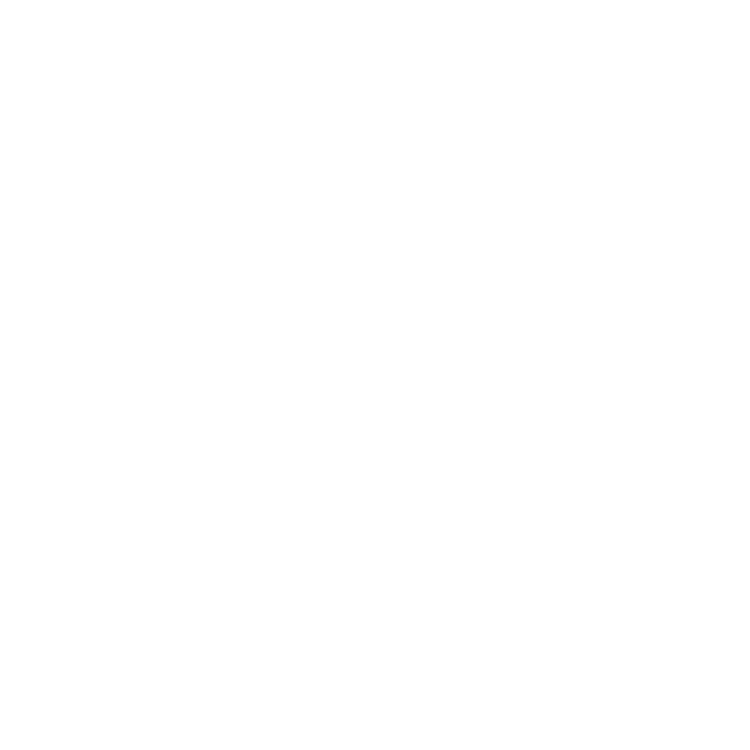

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'gestion': [1, 2, 3, 4, 5],
        'ingresos': [1000, 2000, 1500, 2500, 1800],
        'tiempo_trab_meses': [12, 24, 18, 30, 22],
        'tasa_desempleo': [5, 8, 6, 9, 7],
        'Edad': [25, 30, 28, 35, 32]} 

# Crear una copia del DataFrame original
df_copia = pd.DataFrame(data).copy(deep=True)

# Crear un gráfico de dispersión con líneas de tendencia
scatter_matrix = pd.plotting.scatter_matrix(df_copia, alpha=0.9, figsize=(10, 10))

# Agregar líneas de tendencia utilizando Seaborn
for i, ax_i in enumerate(scatter_matrix):
    for j, ax_j in enumerate(ax_i):
        # Obtener el nombre de las columnas en los ejes x e y
        x_col = df_copia.columns[j]
        y_col = df_copia.columns[i]
        
        # Agregar línea de tendencia solo si las columnas en los ejes x e y son diferentes de 'gestion'
        if x_col != 'gestion' and y_col != 'gestion':
            sns.regplot(x=df_copia[x_col], y=df_copia[y_col], scatter=False, ax=ax_j, color='red')

plt.show()



In [ ]:
df_1.describe()

## Analisis de Componentes principales (PCA)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una copia del DataFrame original
df_1_copy = df_1.copy()

# Seleccionar solo las variables numéricas en la copia
numeric_variables_copy = df_1_copy[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]

# Eliminar filas que contienen valores nulos en las columnas seleccionadas en la copia
numeric_variables_copy = numeric_variables_copy.dropna()

# Estandarizar las variables para que tengan media 0 y desviación estándar 1 (importante para PCA)
scaler = StandardScaler()
numeric_variables_standardized_copy = scaler.fit_transform(numeric_variables_copy)

# Crear un objeto PCA en la copia
pca_copy = PCA()

# Aplicar PCA a las variables estandarizadas en la copia
principal_components_copy = pca_copy.fit_transform(numeric_variables_standardized_copy)

# Obtener las proporciones de varianza explicada por cada componente principal en la copia
explained_variance_ratio_copy = pca_copy.explained_variance_ratio_

# Graficar la varianza explicada acumulativa en la copia
cumulative_explained_variance_copy = explained_variance_ratio_copy.cumsum()
plt.plot(range(1, len(cumulative_explained_variance_copy) + 1), cumulative_explained_variance_copy, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Análisis de Componentes Principales (PCA) - Copia')
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Crear un objeto PCA
pca = PCA()

# Aplicar PCA a las variables estandarizadas
pca_result = pca.fit_transform(numeric_variables_standardized_copy)

# Visualizar la proporción de varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.title('Varianza Explicada Acumulativa por Componentes Principales')
plt.grid(True)
plt.show()

# Imprimir las proporciones de varianza explicada por cada componente principal
print("Proporción de Varianza Explicada por Componente Principal:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Componente Principal {i}: {ratio:.4f}")


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Obtén los pesos (cargas) de las variables originales en cada componente principal
component_weights = pca_copy.components_

# Crea un DataFrame para mostrar los pesos
weights_df = pd.DataFrame(component_weights, columns=numeric_variables_copy.columns)

# Visualiza los pesos para cada componente principal
for i in range(len(weights_df)):
    print(f"\nComponente Principal {i+1}:\n{weights_df.iloc[i]}")



## Modelo de Regresion de minimos cuadrados ordinarios OLS

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Importa tus datos
df_regresion = df_1

df_regresion = df_regresion.dropna(subset=["ingresos", "tiempo_trab_meses", "phrs", "tasa_desempleo"])

# Selecciona las variables independientes y la variable dependiente
X = df_regresion[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]
y = df_regresion["tasa_desempleo"]

# Crea el modelo de regresión
X = sm.add_constant(X)  # Agrega una constante al modelo
model = sm.OLS(y, X).fit()

# Imprime el resumen del modelo
print(model.summary())


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Obtén las predicciones del modelo
y_pred = model.predict(X)

# Calcular métricas de regresión
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



## Factor de inflacion de la varianza y Tolerancia

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprime los resultados del VIF
print("Factor de Inflación de la Varianza (VIF):")
print(vif_data)


In [ ]:
# Calcula la tolerancia para cada variable independiente
tolerance = 1 / vif_data["VIF"]

# Agrega la tolerancia al DataFrame
vif_data["Tolerance"] = tolerance

# Imprime los resultados de la tolerancia
print("Tolerancia:")
print(vif_data)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## Matriz de correlación de Pearson

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona las variables numéricas para el análisis de correlación
variables_numericas = ['Edad','phrs', 'tiempo_trab_meses', 'ingresos', 'tasa_desempleo']

# Crea una subconjunto del DataFrame solo con las variables seleccionadas
df_1_numericas = df_1[variables_numericas]

# Calcula la matriz de correlación de Pearson
matriz_correlacion = df_1_numericas.corr()

# Configuración de colores
colores = sns.color_palette("Blues")

# Crea el gráfico de mapa de calor con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap=colores, fmt=".2f", linewidths=.5)

# Agrega un título al gráfico
plt.title("Matriz de correlación de Pearson")

# Ajusta las etiquetas de los ejes
plt.xticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=45)
plt.yticks(np.arange(0.5, len(variables_numericas) + 0.5), variables_numericas, rotation=0)

# Muestra el gráfico
plt.show()



In [ ]:
%matplotlib inline

# Descriptivos para Variables Categóricas:

In [80]:
df_1.describe(include='object')

,depto,peao,Genero,s1_05,Niv_Ed,Est_Civ,Nacionalidad,ocupacion,Trabaja,Cont_Trab,condact,Segundo_Trab,Aporta_Hog,pagos_extra
count,29082,29082,29082,29082,29082,29082,29082,29082,29082,29082,29082,29082,29082,29082
unique,9,2,2,9,7,4,2,10,2,2,3,2,2,2
top,La Paz,Si,Hombre,JEFE O JEFA DEL HOGAR,Superior,CASADO/A,Boliviano/a,"Trabajadores de la Construcción, Ind. Manufact...",Si,Si,Ocupado,No,Si,No
freq,6245,24078,19122,15723,12214,17860,29014,6763,23670,23606,24078,26686,23339,16091


In [81]:
df_1['peao'].value_counts()

peao
Si    24078
No     5004
Name: count, dtype: int64

In [82]:
import pandas as pd

# Supongamos que estas son las variables en tu DataFrame
variables_categoricas = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion',
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Calcular la frecuencia para cada variable categórica
for variable in variables_categoricas:
    frecuencia_variable = df_1[variable].value_counts()
    print(f"Frecuencia para {variable}:")
    print(frecuencia_variable)
    print()

# Calcular el porcentaje para cada variable categórica
for variable in variables_categoricas:
    porcentaje_variable = df_1[variable].value_counts(normalize=True) * 100
    print(f"Porcentaje para {variable}:")
    print(porcentaje_variable)
    print()


Frecuencia para depto:
depto
La Paz        6245
Santa Cruz    5912
Cochabamba    4983
Potosi        2472
Chuquisaca    2446
Pando         2005
Beni          1824
Tarija        1659
Oruro         1536
Name: count, dtype: int64

Frecuencia para peao:
peao
Si    24078
No     5004
Name: count, dtype: int64

Frecuencia para Genero:
Genero
Hombre    19122
Mujer      9960
Name: count, dtype: int64

Frecuencia para s1_05:
s1_05
JEFE O JEFA DEL HOGAR      15723
HIJO/A O ENTENADO/A         7018
ESPOSA/O O CONVIVIENTE      5095
HERMANO/A O CUÑADO/A         430
YERNO O NUERA                404
NIETO/NIETA                  208
OTRO PARIENTE                141
PADRES/SUEGROS                38
OTRO QUE NO ES PARIENTE       25
Name: count, dtype: int64

Frecuencia para Niv_Ed:
Niv_Ed
Superior                 12214
Secundaria completa       5953
Secundaria incompleta     5174
Primaria incompleta       3548
Primaria completa         1987
Ninguno                    205
Sin especificar              1
Name

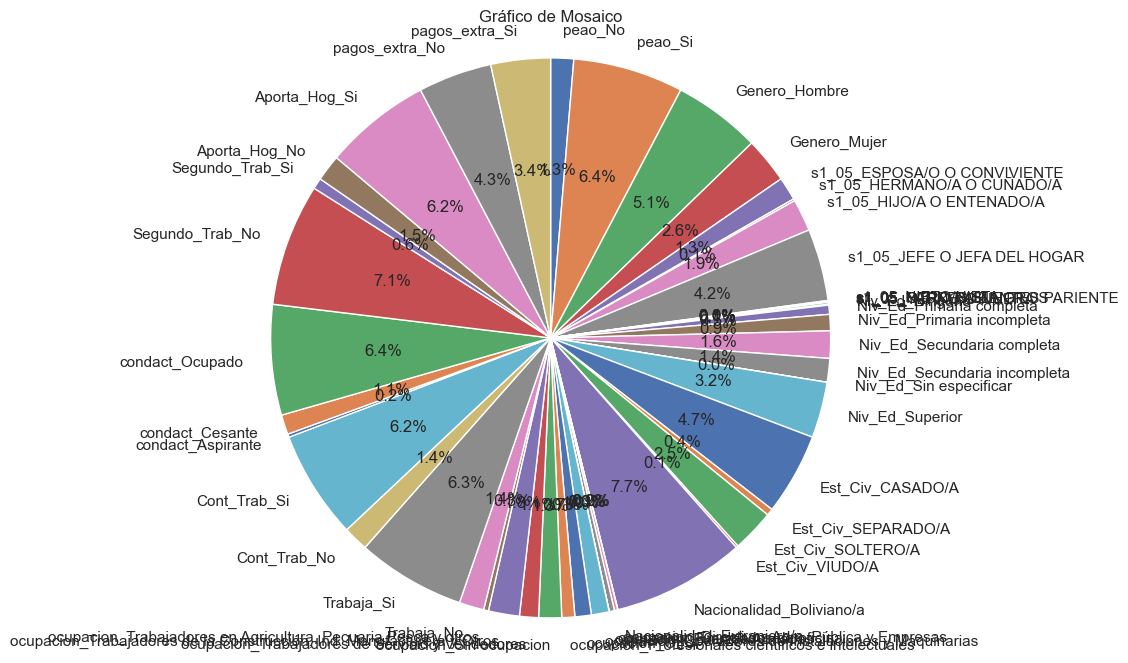

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_1 es tu DataFrame y variables_categoricas es la lista de columnas categóricas
df_subset = pd.get_dummies(df_1[variables_categoricas])

# Configurar el tamaño del gráfico si es necesario
plt.figure(figsize=(10, 8))

# Crear el gráfico de mosaico
plt.pie(df_subset.sum(), labels=df_subset.columns, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Mostrar el gráfico
plt.title('Gráfico de Mosaico')
plt.show()


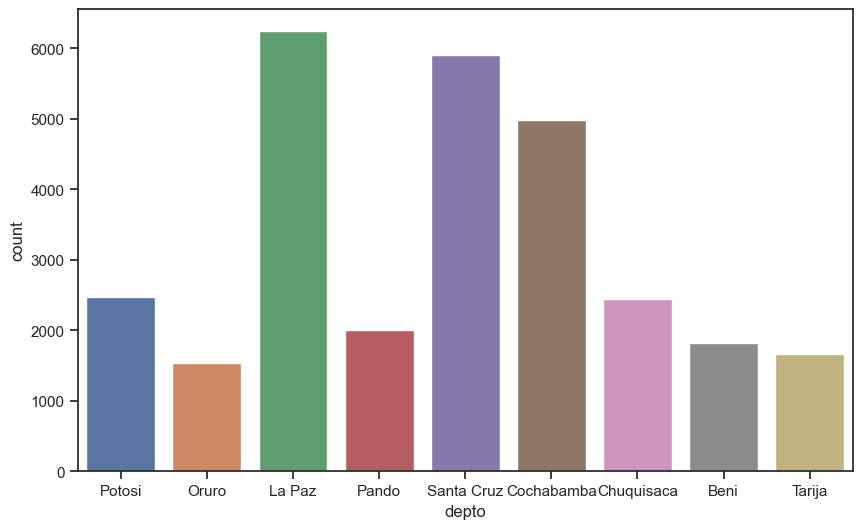

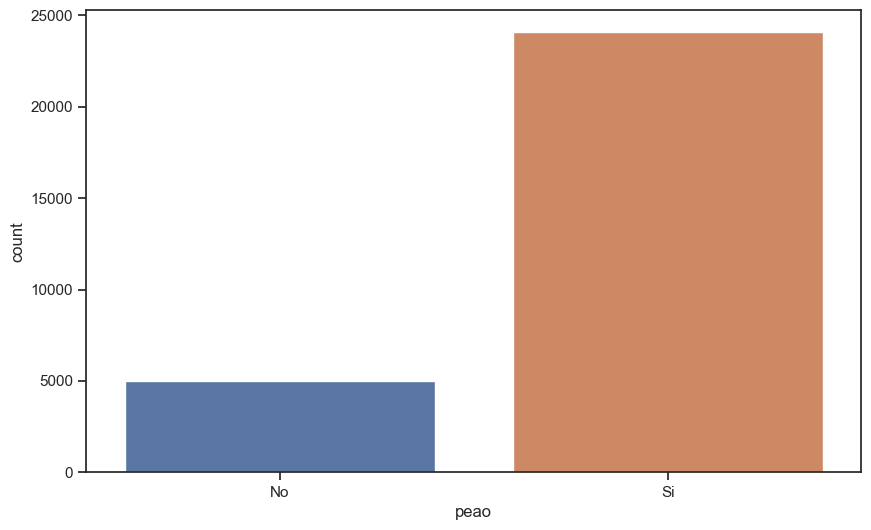

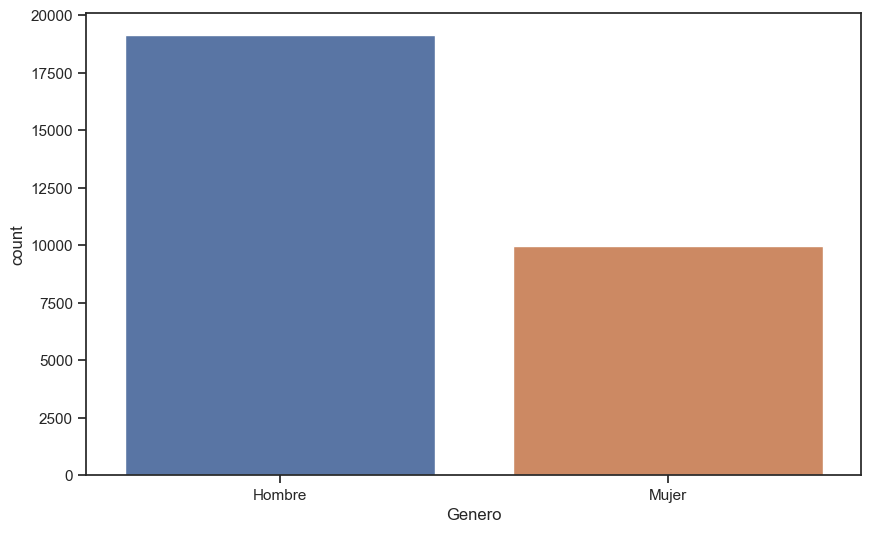

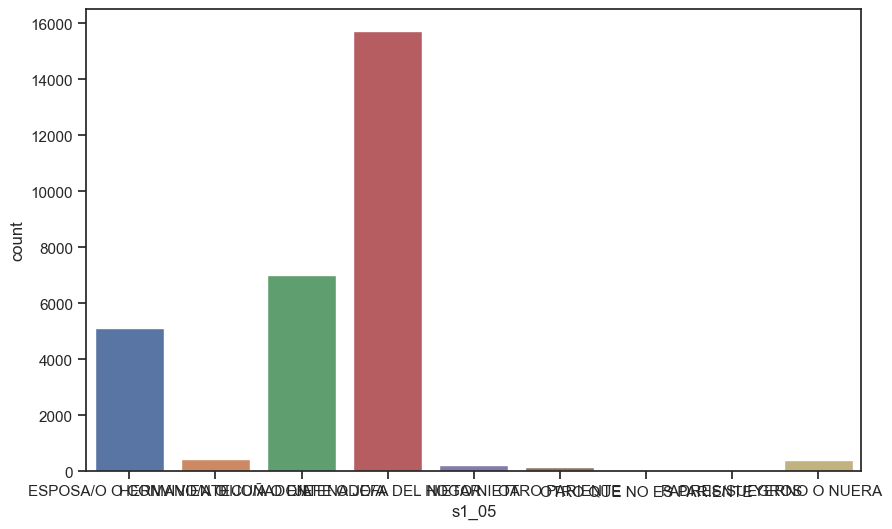

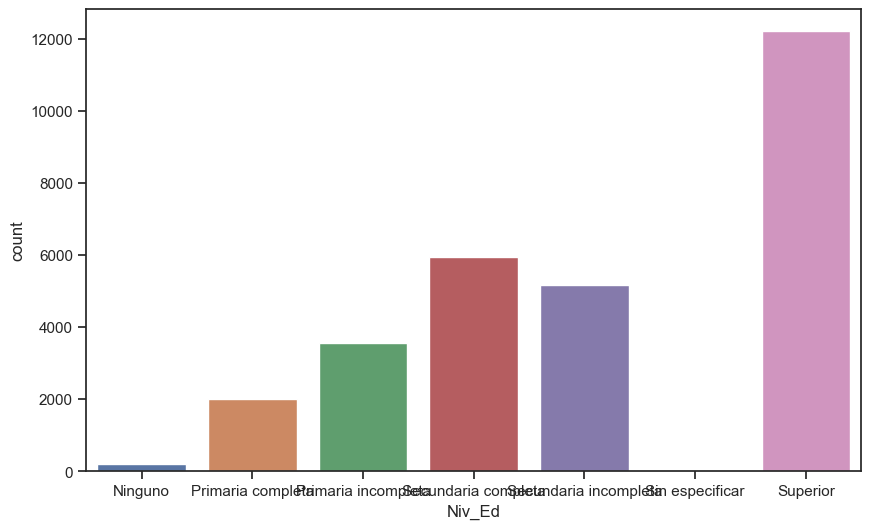

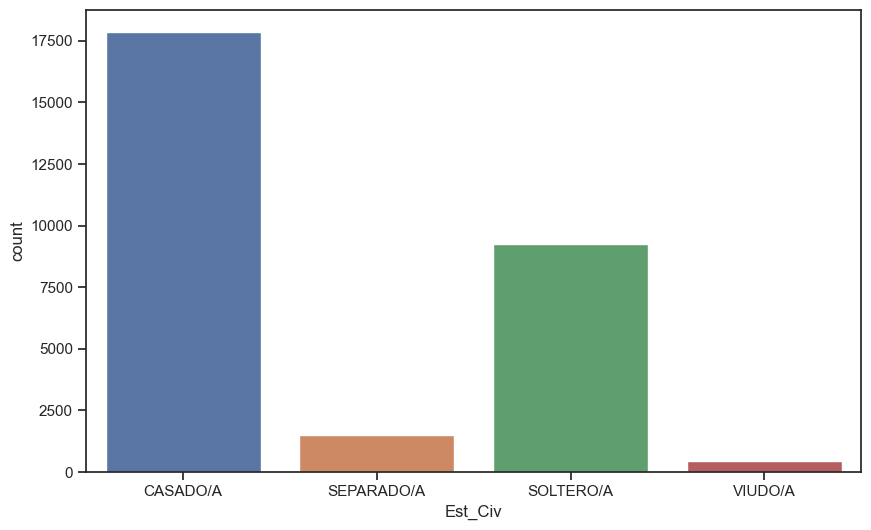

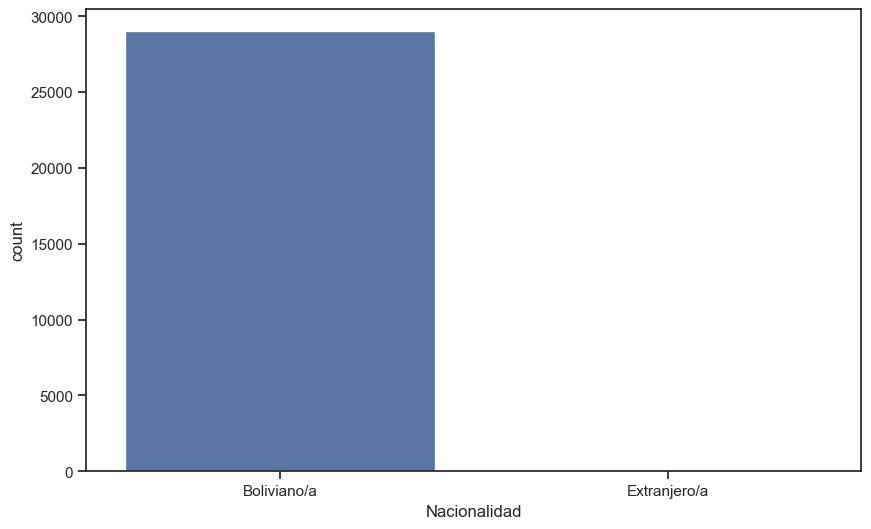

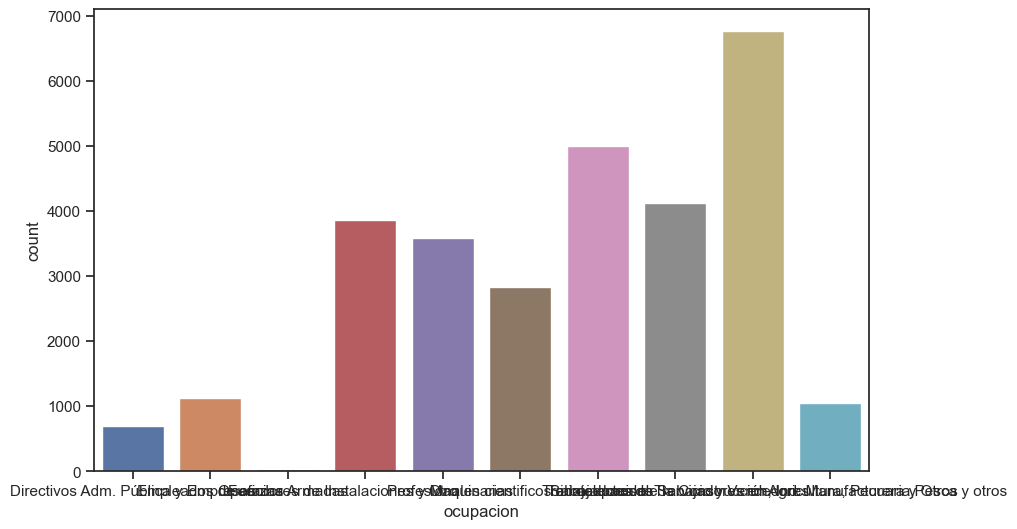

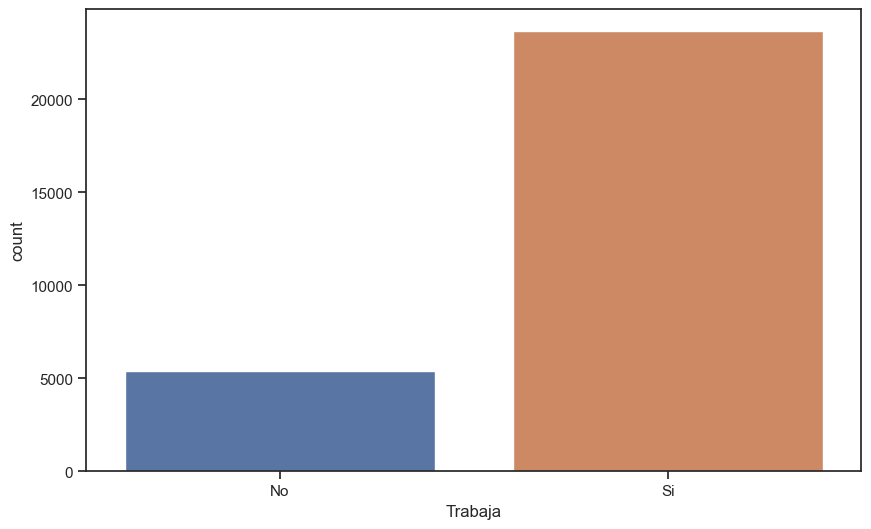

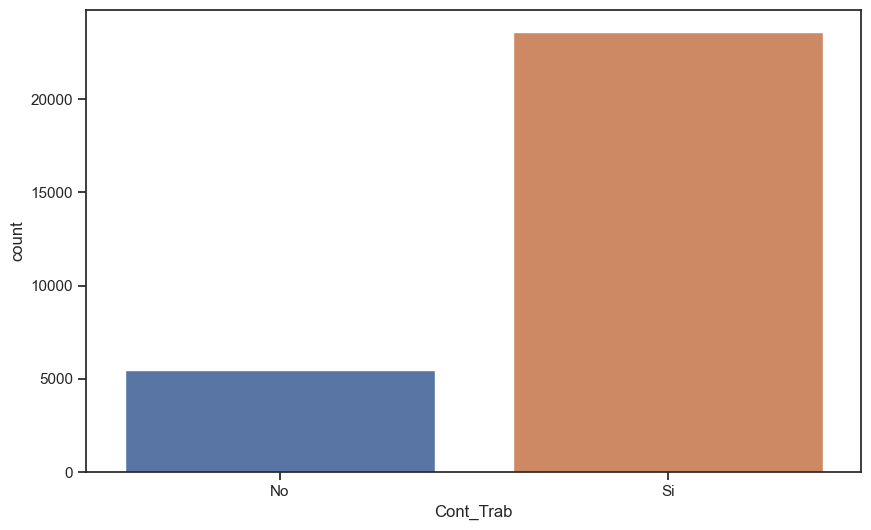

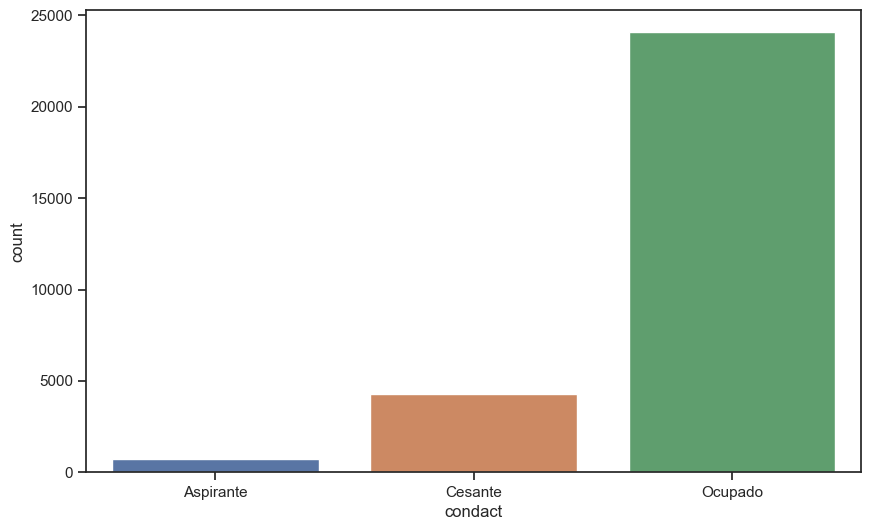

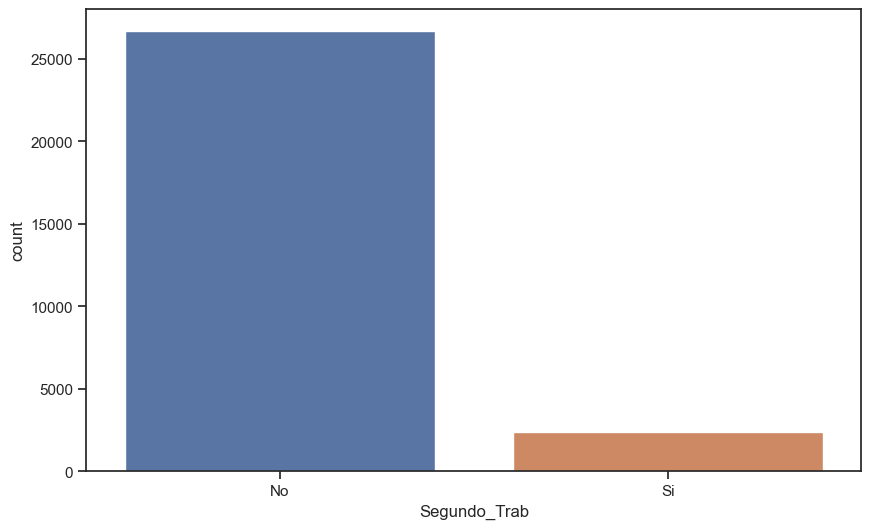

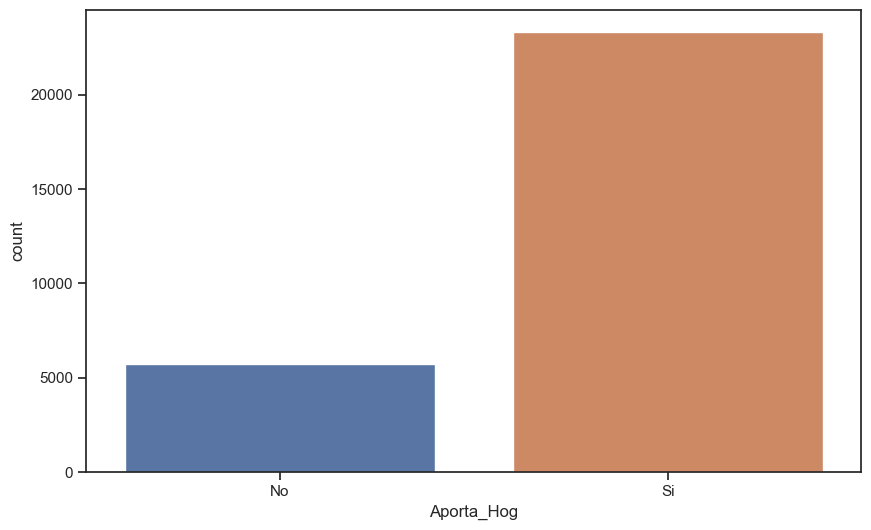

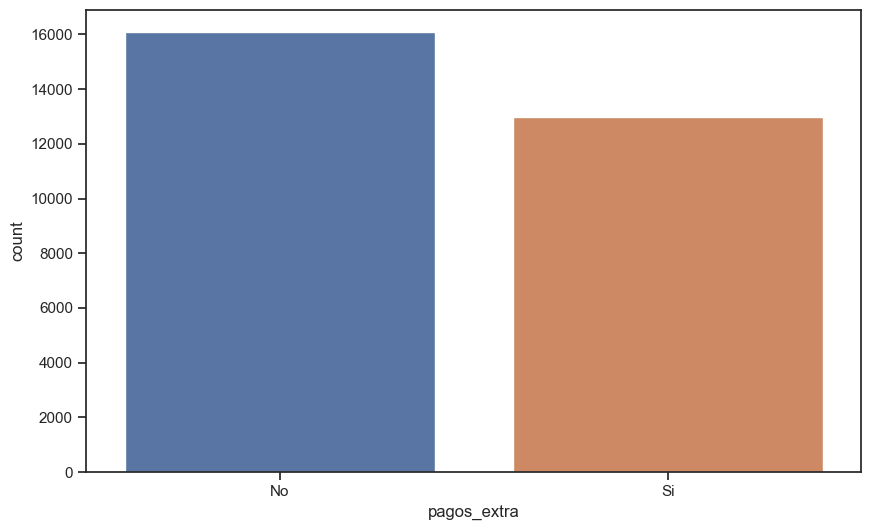

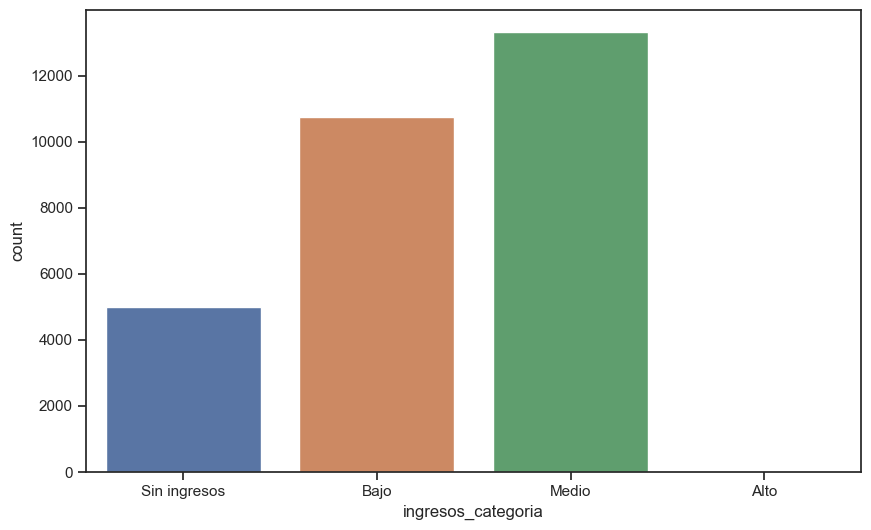

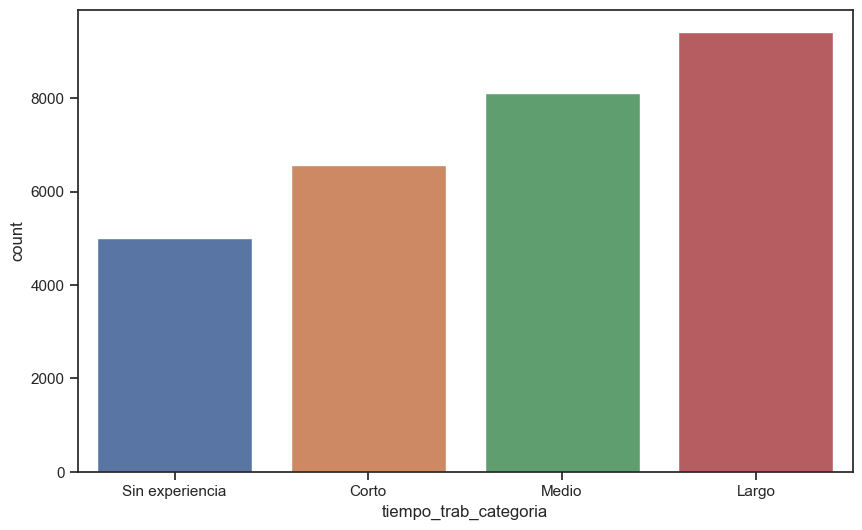

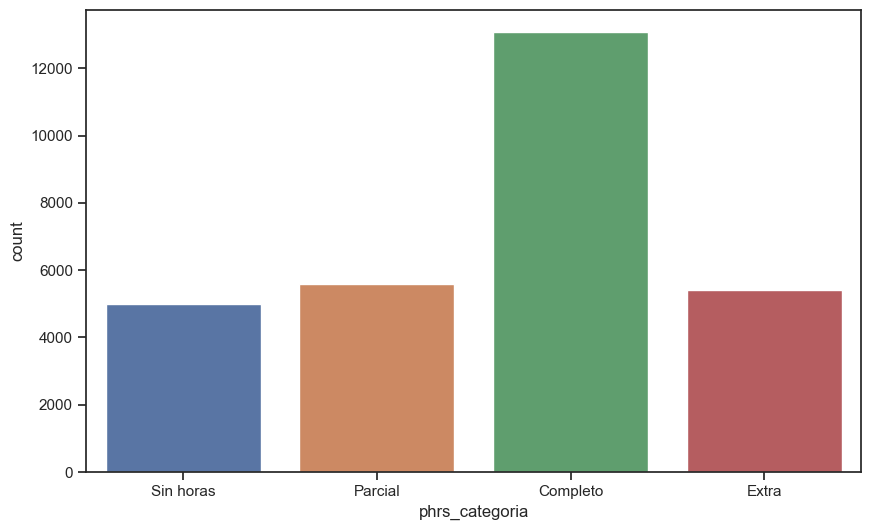

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_1.select_dtypes(include=['object', 'category']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_1)
    plt.show()



In [95]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Lista de tus variables categóricas
variables_categoricas = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

# Bucle para realizar el análisis para cada variable
for variable in variables_categoricas:
    # Asegúrate de que la variable sea de tipo 'category'
    df_1[variable] = pd.Categorical(df_1[variable])

    # Crear una tabla de contingencia
    contingency_table = pd.crosstab(df_1[variable], df_1['tasa_desempleo'])

    # Imprimir la tabla de contingencia
    print(f"\nTabla de Contingencia para {variable}:")
    print(contingency_table)

    # Prueba de Chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"\nChi2: {chi2}, p-value: {p}")

    # Coeficiente de Contingencia (Cramér's V)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    print(f"Coeficiente de Contingencia (Cramér's V) para {variable}: {cramer_v}")

    # Análisis de tendencias (Promedio por Categoría)
    trend_analysis = df_1.groupby(variable)['tasa_desempleo'].mean()
    print(f"\nAnálisis de Tendencias para {variable}:")
    print(trend_analysis)




Tabla de Contingencia para peao:
tasa_desempleo  4.52   4.89  4.90  5.74
peao                                   
No              1114   1099  1314  1477
Si              4002  11270  4711  4095

Chi2: 1104.130118140917, p-value: 4.624174210247614e-239
Coeficiente de Contingencia (Cramér's V) para peao: 0.19458736294294746

Análisis de Tendencias para peao:
peao
No    5.061145
Si    4.975020
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para Genero:
tasa_desempleo  4.52  4.89  4.90  5.74
Genero                                
Hombre          3376  8069  4012  3665
Mujer           1740  4300  2013  1907

Chi2: 3.468718335489325, p-value: 0.3248419682038646
Coeficiente de Contingencia (Cramér's V) para Genero: 0.0040142415907789015

Análisis de Tendencias para Genero:
Genero
Hombre    4.989689
Mujer     4.990129
Name: tasa_desempleo, dtype: float64

Tabla de Contingencia para s1_05:
tasa_desempleo           4.52  4.89  4.90  5.74
s1_05                                        

In [96]:
import pandas as pd
from scipy.stats import chi2_contingency, spearmanr
import numpy as np

# Crear tabla de contingencia para 'ingresos_categoria'
contingency_table_ingresos = pd.crosstab(df_1['ingresos_categoria'], df_1['tasa_desempleo'])
print("Tabla de Contingencia (Ingresos):")
print(contingency_table_ingresos)

# Prueba de Chi-cuadrado para 'ingresos_categoria'
chi2_ingresos, p_ingresos, _, _ = chi2_contingency(contingency_table_ingresos)
print(f"\nChi2 (Ingresos): {chi2_ingresos}, p-value: {p_ingresos}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_ingresos.sum().sum()
phi2_ingresos = chi2_ingresos / n
r, k = contingency_table_ingresos.shape
cramers_v_ingresos = np.sqrt(phi2_ingresos / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Ingresos): {cramers_v_ingresos}")

# Análisis de tendencias para 'ingresos_categoria'
trend_analysis_ingresos = df_1.groupby('ingresos_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Ingresos):")
print(trend_analysis_ingresos)

# Coeficiente de correlación de Spearman para 'ingresos_categoria'
spearman_corr_ingresos, _ = spearmanr(df_1['ingresos_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Ingresos): {spearman_corr_ingresos}")

# Repetir para 'tiempo_trab_categoria'

# Crear tabla de contingencia para 'tiempo_trab_categoria'
contingency_table_tiempo_trab = pd.crosstab(df_1['tiempo_trab_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Tiempo de Trabajo):")
print(contingency_table_tiempo_trab)

# Prueba de Chi-cuadrado para 'tiempo_trab_categoria'
chi2_tiempo_trab, p_tiempo_trab, _, _ = chi2_contingency(contingency_table_tiempo_trab)
print(f"\nChi2 (Tiempo de Trabajo): {chi2_tiempo_trab}, p-value: {p_tiempo_trab}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_tiempo_trab.sum().sum()
phi2_tiempo_trab = chi2_tiempo_trab / n
r, k = contingency_table_tiempo_trab.shape
cramers_v_tiempo_trab = np.sqrt(phi2_tiempo_trab / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Tiempo de Trabajo): {cramers_v_tiempo_trab}")

# Análisis de tendencias para 'tiempo_trab_categoria'
trend_analysis_tiempo_trab = df_1.groupby('tiempo_trab_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Tiempo de Trabajo):")
print(trend_analysis_tiempo_trab)

# Coeficiente de correlación de Spearman para 'tiempo_trab_categoria'
spearman_corr_tiempo_trab, _ = spearmanr(df_1['tiempo_trab_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Tiempo de Trabajo): {spearman_corr_tiempo_trab}")

# Repetir para 'phrs_categoria'

# Crear tabla de contingencia para 'phrs_categoria'
contingency_table_phrs = pd.crosstab(df_1['phrs_categoria'], df_1['tasa_desempleo'])
print("\nTabla de Contingencia (Horas de Trabajo):")
print(contingency_table_phrs)

# Prueba de Chi-cuadrado para 'phrs_categoria'
chi2_phrs, p_phrs, _, _ = chi2_contingency(contingency_table_phrs)
print(f"\nChi2 (Horas de Trabajo): {chi2_phrs}, p-value: {p_phrs}")

# Coeficiente de Contingencia (Cramér's V)
n = contingency_table_phrs.sum().sum()
phi2_phrs = chi2_phrs / n
r, k = contingency_table_phrs.shape
cramers_v_phrs = np.sqrt(phi2_phrs / min((r - 1), (k - 1)))
print(f"\nCoeficiente de Contingencia (Cramér's V) (Horas de Trabajo): {cramers_v_phrs}")

# Análisis de tendencias para 'phrs_categoria'
trend_analysis_phrs = df_1.groupby('phrs_categoria')['tasa_desempleo'].mean()
print("\nAnálisis de Tendencias (Horas de Trabajo):")
print(trend_analysis_phrs)

# Coeficiente de correlación de Spearman para 'phrs_categoria'
spearman_corr_phrs, _ = spearmanr(df_1['phrs_categoria'].cat.codes, df_1['tasa_desempleo'])
print(f"\nCoeficiente de Correlación de Spearman (Horas de Trabajo): {spearman_corr_phrs}")



Tabla de Contingencia (Ingresos):
tasa_desempleo      4.52  4.89  4.90  5.74
ingresos_categoria                        
Sin ingresos        1115  1099  1314  1477
Bajo                1854  4683  2346  1875
Medio               2147  6587  2365  2220

Chi2 (Ingresos): 1206.846272770582, p-value: 1.5787558340938024e-257

Coeficiente de Contingencia (Cramér's V) (Ingresos): 0.14404521756052638

Análisis de Tendencias (Ingresos):
ingresos_categoria
Sin ingresos    5.061037
Bajo            4.976562
Medio           4.973810
Alto                 NaN
Name: tasa_desempleo, dtype: float64

Coeficiente de Correlación de Spearman (Ingresos): -0.08261434808079623

Tabla de Contingencia (Tiempo de Trabajo):
tasa_desempleo         4.52  4.89  4.90  5.74
tiempo_trab_categoria                        
Sin experiencia        1115  1099  1314  1477
Corto                   643  4256   966   699
Medio                  1223  3910  1645  1322
Largo                  2135  3104  2100  2074

Chi2 (Tiempo de Traba

In [97]:
from scipy.stats import chi2_contingency

# Crear una copia del DataFrame original
df_copy = df_1.copy()

categorical_variables = ['peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'Nacionalidad', 'ocupacion', 
                          'Trabaja', 'Cont_Trab', 'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra']

for var1 in categorical_variables:
    for var2 in categorical_variables:
        if var1 != var2:
            # Crear tabla de contingencia
            contingency_table = pd.crosstab(df_copy[var1], df_copy[var2])

            # Realizar la prueba de chi-cuadrado
            chi2, p, _, _ = chi2_contingency(contingency_table)

            # Imprimir resultados
            print(f"Prueba de chi-cuadrado para '{var1}' vs '{var2}': Estadística = {chi2}, Valor p = {p}")

            # Puedes agregar aquí la lógica para usar el valor p y tomar decisiones

Prueba de chi-cuadrado para 'peao' vs 'Genero': Estadística = 648.3371166785282, Valor p = 5.13755199342322e-143
Prueba de chi-cuadrado para 'peao' vs 's1_05': Estadística = 1726.0329290037912, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Niv_Ed': Estadística = 154.80133648788862, Valor p = 7.464437202181386e-31
Prueba de chi-cuadrado para 'peao' vs 'Est_Civ': Estadística = 1180.71198986637, Valor p = 1.1220919540937156e-255
Prueba de chi-cuadrado para 'peao' vs 'Nacionalidad': Estadística = 0.33508462145228074, Valor p = 0.5626803070110589
Prueba de chi-cuadrado para 'peao' vs 'ocupacion': Estadística = 29005.022059549396, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Trabaja': Estadística = 26427.433649148563, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Cont_Trab': Estadística = 26047.92875264805, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'condact': Estadística = 29082.0, Valor p = 0.0
Prueba de chi-cuadrado para 'peao' vs 'Segundo_Trab': Estadística

Prueba de chi-cuadrado para 'ocupacion' vs 'pagos_extra': Estadística = 9336.932231819428, Valor p = 0.0
Prueba de chi-cuadrado para 'Trabaja' vs 'peao': Estadística = 26427.433649148566, Valor p = 0.0
Prueba de chi-cuadrado para 'Trabaja' vs 'Genero': Estadística = 611.7835036106524, Valor p = 4.579671284026085e-135
Prueba de chi-cuadrado para 'Trabaja' vs 's1_05': Estadística = 1532.9337028471728, Valor p = 0.0
Prueba de chi-cuadrado para 'Trabaja' vs 'Niv_Ed': Estadística = 122.38523632165604, Valor p = 5.139768404988755e-24
Prueba de chi-cuadrado para 'Trabaja' vs 'Est_Civ': Estadística = 1037.9333342464784, Valor p = 1.061897962320904e-224
Prueba de chi-cuadrado para 'Trabaja' vs 'Nacionalidad': Estadística = 0.33148466777409635, Valor p = 0.5647861669305888
Prueba de chi-cuadrado para 'Trabaja' vs 'ocupacion': Estadística = 26368.058835953212, Valor p = 0.0
Prueba de chi-cuadrado para 'Trabaja' vs 'Cont_Trab': Estadística = 24901.260840897503, Valor p = 0.0
Prueba de chi-cuadrado

In [98]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# ANOVA para una variable categórica (ejemplo: nivel educativo)
anova_model = ols('tasa_desempleo ~ C(Niv_Ed)', data=df_1).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable para cada categoría de la variable categórica
categories = df['Niv_Ed'].unique()

for category in categories:
    category_df = df[df['Niv_Ed'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
                sum_sq       df         F    PR(>F)
C(Niv_Ed)     1.833155      6.0  2.002953  0.061611
Residual   4435.032995  29075.0       NaN       NaN

Regression Results for Secundaria incompleta:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:37:13   Log-Likelihood:                -3575.6
No. Observations:                8202   AIC:                             7153.
Df Residuals:                    8201   BIC:                             7160.
Df Model:                           0                                         
Covariance Type:            nonrobust                                  

ValueError: resids must contain at least 2 elements

In [99]:
# ANOVA
anova_model = ols('tasa_desempleo ~ C(depto)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Regresión univariable
categories = df['depto'].unique()

for category in categories:
    category_df = df[df['depto'] == category]
    regression_model = ols(f'tasa_desempleo ~ 1', data=category_df).fit()
    
    print(f"\nRegression Results for {category}:")
    print(regression_model.summary())


ANOVA Results:
               sum_sq       df        F        PR(>F)
C(depto)    10.287687      8.0  8.84676  3.540018e-12
Residual  5662.044424  38952.0      NaN           NaN

Regression Results for Potosi:
                            OLS Regression Results                            
Dep. Variable:         tasa_desempleo   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                nan
Time:                        18:37:14   Log-Likelihood:                -1514.8
No. Observations:                3339   AIC:                             3032.
Df Residuals:                    3338   BIC:                             3038.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
 

In [100]:
from scipy.stats import levene
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'Est_Civ'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors = []

# Filtrar los datos para cada categoría de 'Est_Civ' y almacenar los vectores
categorias_est_civ = df_1['Est_Civ'].unique()

for categoria in categorias_est_civ:
    subset_data = df_1[df_1['Est_Civ'] == categoria]['tasa_desempleo']
    data_vectors.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat, p_value = levene(*data_vectors)

# Mostrar los resultados
print(f"Prueba de Levene para todos los datos: Estadística = {stat}, Valor p = {p_value}")



Prueba de Levene para todos los datos: Estadística = 46.222465337508524, Valor p = 8.616509024158226e-30


In [101]:
from scipy.stats import f_oneway

# Suponiendo que 'tasa_desempleo' es tu variable dependiente y 'Est_Civ' es la variable categórica
grupo_categorias = [df_1['tasa_desempleo'][df_1['Est_Civ'] == categoria] for categoria in categorias_est_civ]

# Aplicar ANOVA
stat, p_value = f_oneway(*grupo_categorias)

# Mostrar resultados
print(f"ANOVA: Estadística F = {stat}, Valor p = {p_value}")


ANOVA: Estadística F = 4.367081959565155, Valor p = 0.004428321418228974


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar prueba de Tukey
tukey_results = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Est_Civ'])

# Mostrar resultados
print(tukey_results)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
  CASADO/A SEPARADO/A   0.0103 0.7608 -0.0167 0.0373  False
  CASADO/A  SOLTERO/A   0.0162 0.0065  0.0034 0.0291   True
  CASADO/A    VIUDO/A  -0.0223 0.6177 -0.0695 0.0249  False
SEPARADO/A  SOLTERO/A   0.0059 0.9485 -0.0221 0.0339  False
SEPARADO/A    VIUDO/A  -0.0326 0.3953 -0.0859 0.0207  False
 SOLTERO/A    VIUDO/A  -0.0385 0.1618 -0.0863 0.0092  False
-----------------------------------------------------------


In [103]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'depto'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_depto = []

# Filtrar los datos para cada categoría de 'depto' y almacenar los vectores
categorias_depto = df_1['depto'].unique()

for categoria in categorias_depto:
    subset_data = df_1[df_1['depto'] == categoria]['tasa_desempleo']
    data_vectors_depto.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_depto, p_value_depto = levene(*data_vectors_depto)

# Mostrar los resultados
print(f"Prueba de Levene para 'depto': Estadística = {stat_depto}, Valor p = {p_value_depto}")

# Aplicar ANOVA
grupo_categorias_depto = [df_1['tasa_desempleo'][df_1['depto'] == categoria] for categoria in categorias_depto]
stat_depto_anova, p_value_depto_anova = f_oneway(*grupo_categorias_depto)

# Mostrar resultados ANOVA
print(f"ANOVA para 'depto': Estadística F = {stat_depto_anova}, Valor p = {p_value_depto_anova}")

# Realizar prueba de Tukey
tukey_results_depto = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['depto'])

# Mostrar resultados Tukey
print(tukey_results_depto)



Prueba de Levene para 'depto': Estadística = 21.3792689494971, Valor p = 9.887566415911806e-33
ANOVA para 'depto': Estadística F = 11.910621344868089, Valor p = 4.1911391721051164e-17
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
      Beni Chuquisaca   0.0611    0.0  0.0236  0.0985   True
      Beni Cochabamba    0.091    0.0  0.0579  0.1241   True
      Beni     La Paz   0.0445 0.0006  0.0124  0.0767   True
      Beni      Oruro   0.0273 0.5259 -0.0146  0.0692  False
      Beni      Pando     0.07    0.0  0.0308  0.1091   True
      Beni     Potosi   0.0595    0.0  0.0221  0.0968   True
      Beni Santa Cruz   0.0592    0.0  0.0268  0.0916   True
      Beni     Tarija   0.0631 0.0001   0.022  0.1041   True
Chuquisaca Cochabamba     0.03 0.0486  0.0001  0.0598   True
Chuquisaca     La Paz  -0.0165 0.6985 -0.0454  0.0123  False
Chuquisaca      Oruro  

In [104]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'ocupacion'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_ocupacion = []

# Filtrar los datos para cada categoría de 'ocupacion' y almacenar los vectores
categorias_ocupacion = df_1['ocupacion'].unique()

for categoria in categorias_ocupacion:
    subset_data = df_1[df_1['ocupacion'] == categoria]['tasa_desempleo']
    data_vectors_ocupacion.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_ocupacion, p_value_ocupacion = levene(*data_vectors_ocupacion)

# Mostrar los resultados
print(f"Prueba de Levene para 'ocupacion': Estadística = {stat_ocupacion}, Valor p = {p_value_ocupacion}")

# Aplicar ANOVA
grupo_categorias_ocupacion = [df_1['tasa_desempleo'][df_1['ocupacion'] == categoria] for categoria in categorias_ocupacion]
stat_ocupacion_anova, p_value_ocupacion_anova = f_oneway(*grupo_categorias_ocupacion)

# Mostrar resultados ANOVA
print(f"ANOVA para 'ocupacion': Estadística F = {stat_ocupacion_anova}, Valor p = {p_value_ocupacion_anova}")

# Realizar prueba de Tukey
tukey_results_ocupacion = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['ocupacion'])

# Mostrar resultados Tukey
print(tukey_results_ocupacion)


Prueba de Levene para 'ocupacion': Estadística = 74.14334126827879, Valor p = 2.977777212855836e-136
ANOVA para 'ocupacion': Estadística F = 26.07038861684398, Valor p = 2.708051573171054e-45


C:\Users\win10\anaconda3\jupyter\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                                                     Multiple Comparison of Means - Tukey HSD, FWER=0.05                                                      
                           group1                                                      group2                           meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------------------------------------------------------
                         Directivos Adm. Pública y Empresas                                        Empleados de oficina   0.0156 0.9981 -0.0436  0.0747  False
                         Directivos Adm. Pública y Empresas                                             Fuerzas Armadas  -0.0637 0.9944 -0.2741  0.1467  False
                         Directivos Adm. Pública y Empresas                   Operadores de Instalaciones y Maquinarias   0.0233 0.9086 -0.0273  0.0738  False
                         Directivos Adm. Públi

In [105]:
from scipy.stats import levene
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Supongamos que tienes un DataFrame llamado 'df_1' con la variable dependiente 'tasa_desempleo'
# y la variable categórica 'condact'

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_condact = []

# Filtrar los datos para cada categoría de 'condact' y almacenar los vectores
categorias_condact = df_1['condact'].unique()

for categoria in categorias_condact:
    subset_data = df_1[df_1['condact'] == categoria]['tasa_desempleo']
    data_vectors_condact.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_condact, p_value_condact = levene(*data_vectors_condact)

# Mostrar los resultados
print(f"Prueba de Levene para 'condact': Estadística = {stat_condact}, Valor p = {p_value_condact}")

# Aplicar ANOVA
grupo_categorias_condact = [df_1['tasa_desempleo'][df_1['condact'] == categoria] for categoria in categorias_condact]
stat_condact_anova, p_value_condact_anova = f_oneway(*grupo_categorias_condact)

# Mostrar resultados ANOVA
print(f"ANOVA para 'condact': Estadística F = {stat_condact_anova}, Valor p = {p_value_condact_anova}")

# Realizar prueba de Tukey
tukey_results_condact = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['condact'])

# Mostrar resultados Tukey
print(tukey_results_condact)


Prueba de Levene para 'condact': Estadística = 328.3880461435944, Valor p = 9.324081027649866e-142
ANOVA para 'condact': Estadística F = 103.49155919631843, Valor p = 1.6345307696058408e-45
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2 meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Aspirante Cesante   0.0323 0.1038 -0.0049  0.0694  False
Aspirante Ocupado  -0.0584 0.0003 -0.0933 -0.0234   True
  Cesante Ocupado  -0.0906    0.0 -0.1057 -0.0755   True
--------------------------------------------------------


In [106]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_s1_05 = []

# Filtrar los datos para cada categoría de 's1_05' y almacenar los vectores
categorias_s1_05 = df_1['s1_05'].unique()

for categoria in categorias_s1_05:
    subset_data = df_1[df_1['s1_05'] == categoria]['tasa_desempleo']
    data_vectors_s1_05.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_s1_05, p_value_s1_05 = levene(*data_vectors_s1_05)

# Mostrar los resultados
print(f"Prueba de Levene para 's1_05': Estadística = {stat_s1_05}, Valor p = {p_value_s1_05}")

# Aplicar ANOVA
grupo_categorias_s1_05 = [df_1['tasa_desempleo'][df_1['s1_05'] == categoria] for categoria in categorias_s1_05]
stat_s1_05_anova, p_value_s1_05_anova = f_oneway(*grupo_categorias_s1_05)

# Mostrar resultados ANOVA
print(f"ANOVA para 's1_05': Estadística F = {stat_s1_05_anova}, Valor p = {p_value_s1_05_anova}")

# Realizar prueba de Tukey
tukey_results_s1_05 = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['s1_05'])

# Mostrar resultados Tukey
print(tukey_results_s1_05)



Prueba de Levene para 's1_05': Estadística = 50.764962257944994, Valor p = 3.5954641635265056e-82
ANOVA para 's1_05': Estadística F = 4.687156073899761, Valor p = 9.401903595858583e-06
                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------
 ESPOSA/O O CONVIVIENTE    HERMANO/A O CUÑADO/A  -0.0005    1.0 -0.0613  0.0603  False
 ESPOSA/O O CONVIVIENTE     HIJO/A O ENTENADO/A   0.0205 0.0999 -0.0018  0.0428  False
 ESPOSA/O O CONVIVIENTE   JEFE O JEFA DEL HOGAR  -0.0092 0.8738 -0.0287  0.0103  False
 ESPOSA/O O CONVIVIENTE             NIETO/NIETA   0.0447 0.7944 -0.0409  0.1304  False
 ESPOSA/O O CONVIVIENTE           OTRO PARIENTE   -0.081 0.2673 -0.1844  0.0224  False
 ESPOSA/O O CONVIVIENTE OTRO QUE NO ES PARIENTE   -0.031    1.0 -0.2738  0.2118  False
 ESPOSA/O O CONVIVIENTE         

In [107]:
from scipy.stats import levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista para almacenar los vectores de datos para cada categoría
data_vectors_genero = []

# Filtrar los datos para cada categoría de 'Genero' y almacenar los vectores
categorias_genero = df_1['Genero'].unique()

for categoria in categorias_genero:
    subset_data = df_1[df_1['Genero'] == categoria]['tasa_desempleo']
    data_vectors_genero.append(subset_data)

# Aplicar la prueba de Levene para verificar la homogeneidad de varianzas
stat_genero, p_value_genero = levene(*data_vectors_genero)

# Mostrar los resultados
print(f"Prueba de Levene para 'Genero': Estadística = {stat_genero}, Valor p = {p_value_genero}")

# Aplicar ANOVA
grupo_categorias_genero = [df_1['tasa_desempleo'][df_1['Genero'] == categoria] for categoria in categorias_genero]
stat_genero_anova, p_value_genero_anova = f_oneway(*grupo_categorias_genero)

# Mostrar resultados ANOVA
print(f"ANOVA para 'Genero': Estadística F = {stat_genero_anova}, Valor p = {p_value_genero_anova}")

# Realizar prueba de Tukey
tukey_results_genero = pairwise_tukeyhsd(df_1['tasa_desempleo'], df_1['Genero'])

# Mostrar resultados Tukey
print(tukey_results_genero)



Prueba de Levene para 'Genero': Estadística = 0.05173651324566294, Valor p = 0.8200702977066554
ANOVA para 'Genero': Estadística F = 0.008297516105523026, Valor p = 0.9274211475501232
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
Hombre  Mujer   0.0004 0.9274 -0.009 0.0099  False
--------------------------------------------------


In [108]:
# Muestra los tipos de datos de cada columna
print(df_1.dtypes)


gestion                     int64
trimestre                   int64
id_persona                  int64
depto                      object
peao                     category
Genero                   category
Edad                      float64
s1_05                    category
Niv_Ed                   category
Est_Civ                  category
Nacionalidad             category
ocupacion                category
Trabaja                  category
Cont_Trab                category
condact                  category
phrs                      float64
Segundo_Trab             category
Aporta_Hog               category
tiempo_trab_meses         float64
ingresos                  float64
pagos_extra              category
tasa_desempleo            float64
ingresos_categoria       category
tiempo_trab_categoria    category
phrs_categoria           category
dtype: object


In [109]:
df_cleaned=df_1.copy()

# Columnas numéricas con valores nulos
columnas_numericas = ['phrs', 'tiempo_trab_meses', 'ingresos']

# Convierte las columnas a tipo numérico
df_cleaned[columnas_numericas] = df_cleaned[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Muestra información sobre los valores nulos y los tipos de datos después de la conversión
print(df_cleaned.info())

# Llena los valores nulos con una estrategia específica (por ejemplo, usando la media)
df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 29082 entries, 9 to 114683
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                29082 non-null  int64   
 1   trimestre              29082 non-null  int64   
 2   id_persona             29082 non-null  int64   
 3   depto                  29082 non-null  object  
 4   peao                   29082 non-null  category
 5   Genero                 29082 non-null  category
 6   Edad                   29082 non-null  float64 
 7   s1_05                  29082 non-null  category
 8   Niv_Ed                 29082 non-null  category
 9   Est_Civ                29082 non-null  category
 10  Nacionalidad           29082 non-null  category
 11  ocupacion              29082 non-null  category
 12  Trabaja                29082 non-null  category
 13  Cont_Trab              29082 non-null  category
 14  condact                29082 non-null  cat

C:\Users\win10\AppData\Local\Temp\ipykernel_9372\757142728.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[columnas_numericas].fillna(df[columnas_numericas].mean(), inplace=True)


In [110]:
# Elimina las filas con valores nulos
df_cleaned.dropna(inplace=True)

# Verifica el nuevo estado del DataFrame
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 24077 entries, 9 to 114683
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gestion                24077 non-null  int64   
 1   trimestre              24077 non-null  int64   
 2   id_persona             24077 non-null  int64   
 3   depto                  24077 non-null  object  
 4   peao                   24077 non-null  category
 5   Genero                 24077 non-null  category
 6   Edad                   24077 non-null  float64 
 7   s1_05                  24077 non-null  category
 8   Niv_Ed                 24077 non-null  category
 9   Est_Civ                24077 non-null  category
 10  Nacionalidad           24077 non-null  category
 11  ocupacion              24077 non-null  category
 12  Trabaja                24077 non-null  category
 13  Cont_Trab              24077 non-null  category
 14  condact                24077 non-null  cat

In [111]:
# Convertir todos los valores de la columna 'phrs' a cadenas
df_cleaned['phrs'] = df_cleaned['phrs'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'phrs'
df_cleaned['phrs'] = df_cleaned['phrs'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'phrs'
print("Valores únicos en la columna 'phrs':")
print(df_cleaned['phrs'].unique())

# Verificar la cantidad de valores nulos en la columna 'phrs'
print("Cantidad de valores nulos en la columna 'phrs':")
print(df_cleaned['phrs'].isnull().sum())

# Convertir todos los valores de la columna 'ingresos' a cadenas
df_cleaned['ingresos'] = df_cleaned['ingresos'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'ingresos'
df_cleaned['ingresos'] = df_cleaned['ingresos'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'ingresos'
print("Valores únicos en la columna 'ingresos':")
print(df_cleaned['ingresos'].unique())

# Verificar la cantidad de valores nulos en la columna 'ingresos'
print("Cantidad de valores nulos en la columna 'ingresos':")
print(df_cleaned['ingresos'].isnull().sum())

# Convertir todos los valores de la columna 'tiempo_trab_meses' a cadenas
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].astype(str)

# Eliminar espacios en blanco al principio y al final de los valores en la columna 'tiempo_trab_meses'
df_cleaned['tiempo_trab_meses'] = df_cleaned['tiempo_trab_meses'].str.strip()

# Verificar nuevamente los valores únicos en la columna 'tiempo_trab_meses'
print("Valores únicos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].unique())

# Verificar la cantidad de valores nulos en la columna 'tiempo_trab_meses'
print("Cantidad de valores nulos en la columna 'tiempo_trab_meses':")
print(df_cleaned['tiempo_trab_meses'].isnull().sum())


Valores únicos en la columna 'phrs':
['60.0' '16.0' '10.0' '48.0' '54.0' '40.0' '14.0' '32.0' '44.0' '6.0'
 '56.0' '72.0' '70.0' '30.0' '55.0' '50.0' '35.0' '24.0' '45.0' '12.0'
 '36.0' '18.0' '25.0' '63.0' '20.0' '42.0' '21.0' '66.0' '52.0' '49.5'
 '22.5' '49.0' '26.0' '28.0' '8.0' '9.0' '15.0' '46.75' '27.0' '22.0'
 '65.0' '27.5' '60.5' '5.0' '7.5' '58.5' '11.0' '32.5' '69.0' '17.5' '3.0'
 '33.0' '7.0' '3.5' '8.5' '71.5' '51.0' '38.5' '73.5' '37.5' '10.5' '45.5'
 '39.0' '4.0' '52.25' '13.0' '62.5' '41.25' '42.5' '75.0' '55.5' '57.0'
 '25.5' '64.0' '28.75' '57.75' '47.5' '4.5' '12.5' '13.5' '24.75' '31.5'
 '16.5' '52.5' '59.5' '35.75' '48.125' '33.75']
Cantidad de valores nulos en la columna 'phrs':
0
Valores únicos en la columna 'ingresos':
['3000.0' '2100.0' '2400.0' '3600.0' '2600.0' '2000.0' '4000.0' '4500.0'
 '4117.0' '2500.0' '6000.0' '3200.0' '2800.0' '3800.0' '3850.0' '3045.0'
 '3500.0' '5352.0' '5000.0' '5400.0' '2640.0' '2200.0' '2880.0' '2118.0'
 '2300.0' '3332.0' '2240.0' 

In [112]:
df_1['Edad'] = df_1['Edad'].astype('float64')

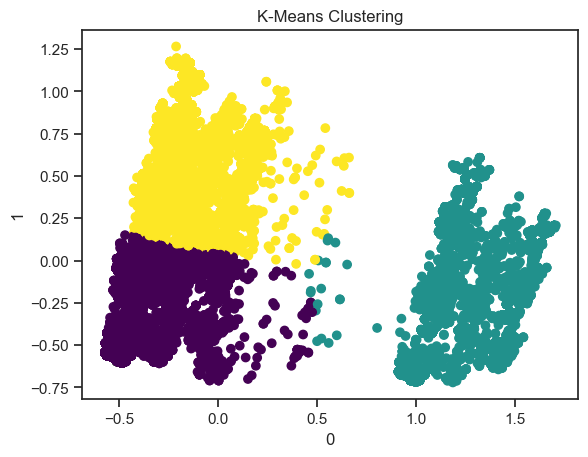

          0         1  Edad  tiempo_trab_meses  ingresos  phrs
0 -0.484200 -0.604605  23.0              242.0    3000.0  60.0
1  1.202375  0.110330  21.0                NaN       NaN   NaN
2 -0.473821 -0.513762  22.0              121.0    3000.0  60.0
3 -0.228090  0.767267  23.0              242.0    3000.0  16.0
4 -0.202057  0.800641  34.0              121.0    2100.0  10.0


In [113]:
import pandas as pd
from prince import MCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

# DataFrame original
df_original = df_1.copy()

# Variables categóricas
categorical_vars = ['depto', 'Genero', 'Niv_Ed','s1_05', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact']

# Lidiar con valores faltantes (NaN)
imputer = SimpleImputer(strategy='most_frequent')
df_original[categorical_vars] = imputer.fit_transform(df_original[categorical_vars])

# Lidiar con valores infinitos (inf)
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Realizar el Análisis de Correspondencia Múltiple (MCA) para las variables categóricas
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_original[categorical_vars])

# Combinar las variables MCA con las numéricas
combined_data = pd.concat([mca_results, df_original[['Edad', 'tiempo_trab_meses', 'ingresos', 'phrs']]], axis=1)

# Convertir todos los nombres de columnas a cadenas
combined_data.columns = combined_data.columns.astype(str)

# Imputar valores NaN con la media para todas las columnas numéricas
imputer = SimpleImputer(strategy='mean')
imputed_values = imputer.fit_transform(combined_data)

# Crear un DataFrame con los valores imputados
combined_data_imputed = pd.DataFrame(imputed_values, columns=combined_data.columns)

# Aplicar K-Means Clustering solo en las variables MCA
kmeans = KMeans(n_clusters=3)
# Utilizar los nombres de las columnas del MCA resultante
cluster_columns = mca_results.columns.astype(str)
combined_data_imputed['cluster'] = kmeans.fit_predict(combined_data_imputed[cluster_columns])

# Visualizar los resultados
plt.scatter(combined_data_imputed[cluster_columns[0]], combined_data_imputed[cluster_columns[1]], c=combined_data_imputed['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(cluster_columns[0])
plt.ylabel(cluster_columns[1])
plt.show()

# Ajustar los índices antes de asignar la columna 'cluster'
combined_data = combined_data.reset_index(drop=True)

# Asegurarse de que 'cluster' esté presente en 'combined_data_imputed' antes de la asignación
if 'cluster' in combined_data_imputed.columns:
    # Asegurarse de que 'cluster' esté presente en 'combined_data' antes de la asignación
    if 'cluster' in combined_data.columns:
        combined_data['cluster'] = combined_data_imputed['cluster']

# Mostrar el DataFrame con la información del clúster
print(combined_data.head())



Composición de Clústeres para depto:
cluster      0.0  1.0   2.0  Total
depto                             
Beni         195   81   135    411
Chuquisaca   324  124   206    654
Cochabamba   353  114   283    750
La Paz       477  166   354    997
Oruro        143   50   100    293
Pando        138   54   112    304
Potosi       198   90   163    451
Santa Cruz   523  186   392   1101
Tarija       140   64   108    312
Total       2491  929  1853   5273



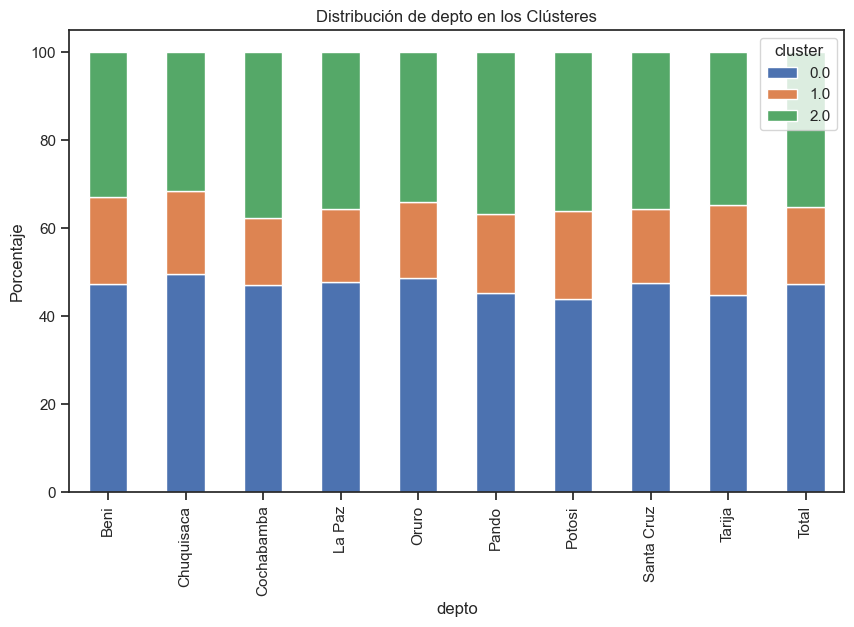


Composición de Clústeres para Genero:
cluster   0.0  1.0   2.0  Total
Genero                         
Hombre   1649  631  1201   3481
Mujer     842  298   652   1792
Total    2491  929  1853   5273



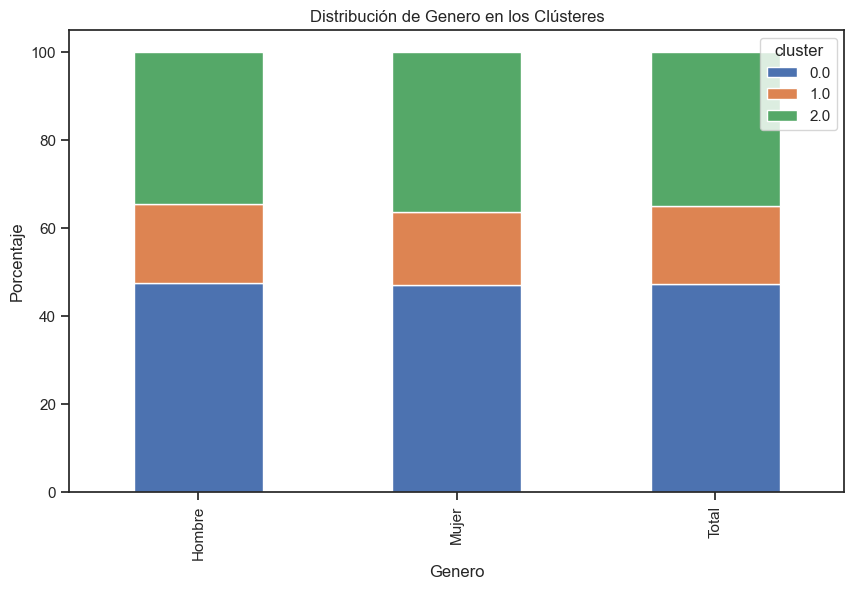


Composición de Clústeres para Niv_Ed:
cluster                 0.0  1.0   2.0  Total
Niv_Ed                                       
Ninguno                  20    6    11     37
Primaria completa       106   60    83    249
Primaria incompleta     352  130   277    759
Secundaria completa     592  183   378   1153
Secundaria incompleta   422  169   340    931
Sin especificar           0    1     0      1
Superior                999  380   764   2143
Total                  2491  929  1853   5273



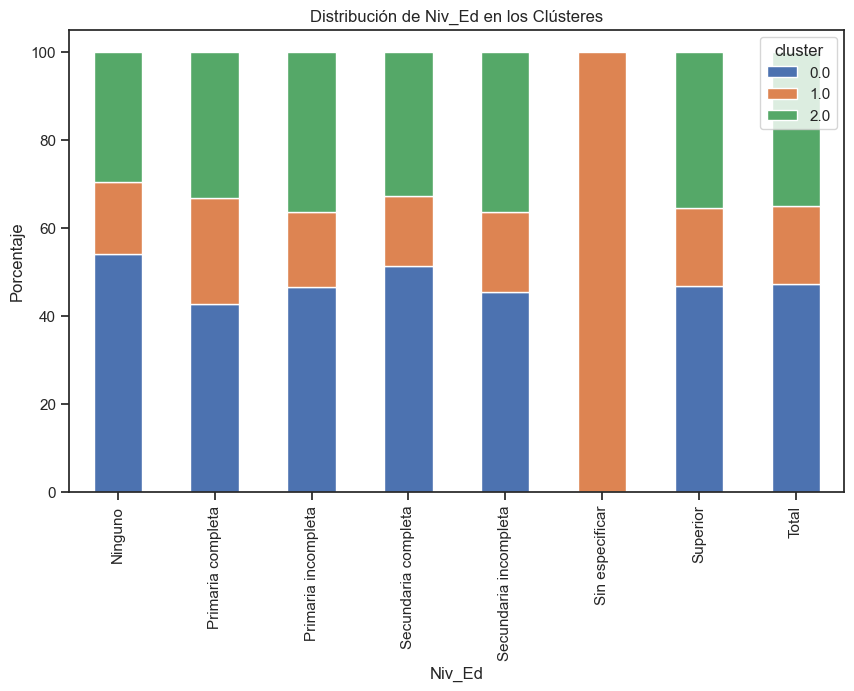


Composición de Clústeres para s1_05:
cluster                   0.0  1.0   2.0  Total
s1_05                                          
ESPOSA/O O CONVIVIENTE    373  135   294    802
HERMANO/A O CUÑADO/A       56   27    47    130
HIJO/A O ENTENADO/A       788  270   568   1626
JEFE O JEFA DEL HOGAR    1169  450   864   2483
NIETO/NIETA                26    8    11     45
OTRO PARIENTE              21    8    20     49
OTRO QUE NO ES PARIENTE     1    0     6      7
PADRES/SUEGROS              4    1     4      9
YERNO O NUERA              53   30    39    122
Total                    2491  929  1853   5273



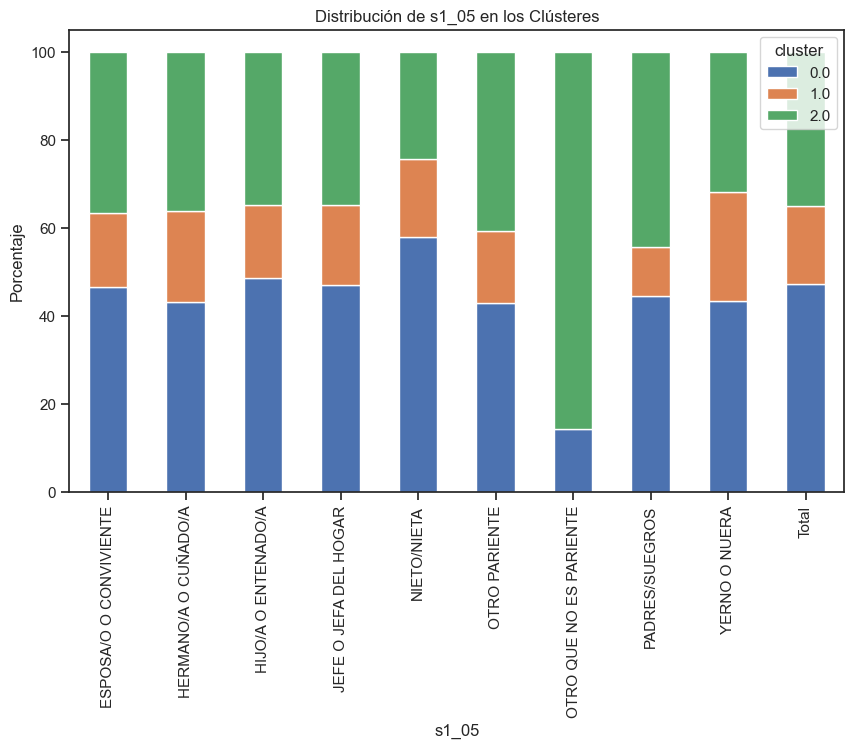


Composición de Clústeres para Est_Civ:
cluster      0.0  1.0   2.0  Total
Est_Civ                           
CASADO/A    1426  543  1043   3012
SEPARADO/A   119   41    81    241
SOLTERO/A    919  329   709   1957
VIUDO/A       27   16    20     63
Total       2491  929  1853   5273



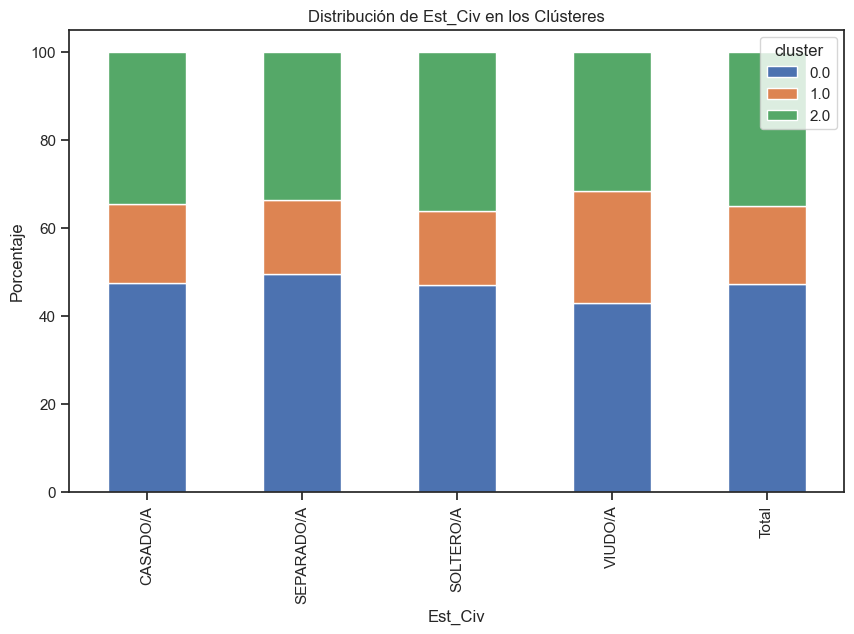


Composición de Clústeres para ocupacion:
cluster                                              0.0  1.0   2.0  Total
ocupacion                                                                 
Directivos Adm. Pública y Empresas                    75   17    52    144
Empleados de oficina                                  88   44    62    194
Fuerzas Armadas                                        2    1     6      9
Operadores de Instalaciones y Maquinarias            293  124   226    643
Otro                                                 310  118   230    658
Profesionales cientificos e intelectuales            253   87   190    530
Sin ocupacion                                        541  196   411   1148
Trabajadores de Servicio y Vendedores                301  106   223    630
Trabajadores de la Construcción, Ind. Manufactu...   568  201   403   1172
Trabajadores en Agricultura, Pecuaria,Pesca y o...    60   35    50    145
Total                                               2491  

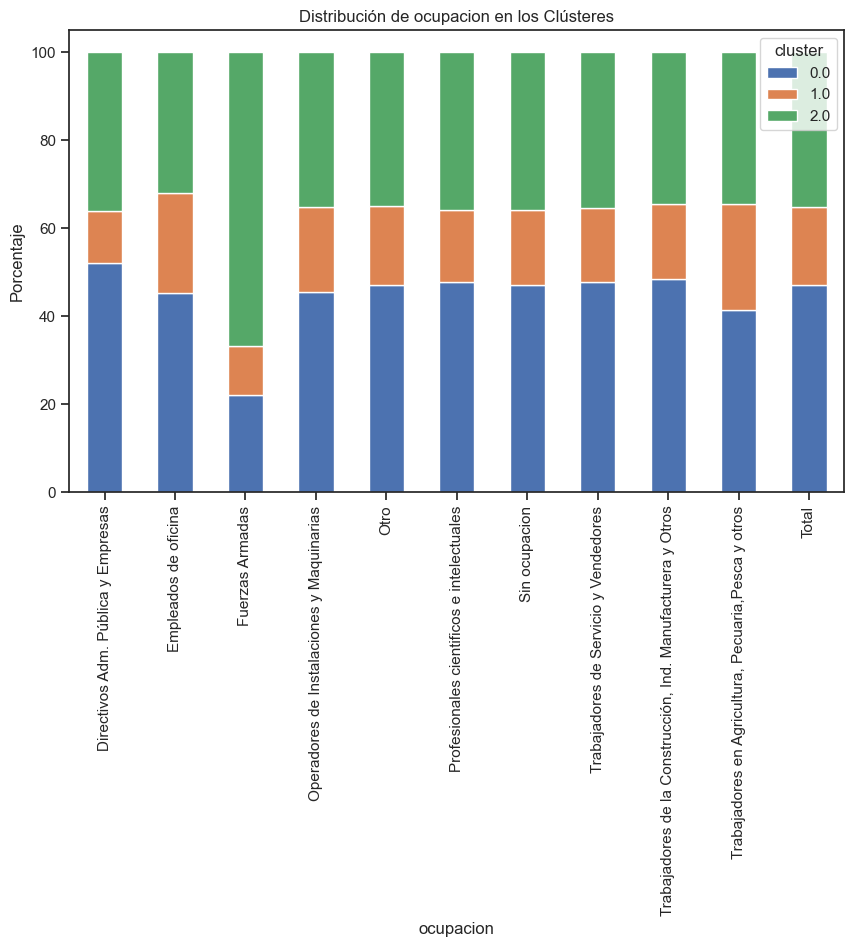


Composición de Clústeres para Trabaja:
cluster   0.0  1.0   2.0  Total
Trabaja                        
No        578  207   442   1227
Si       1913  722  1411   4046
Total    2491  929  1853   5273



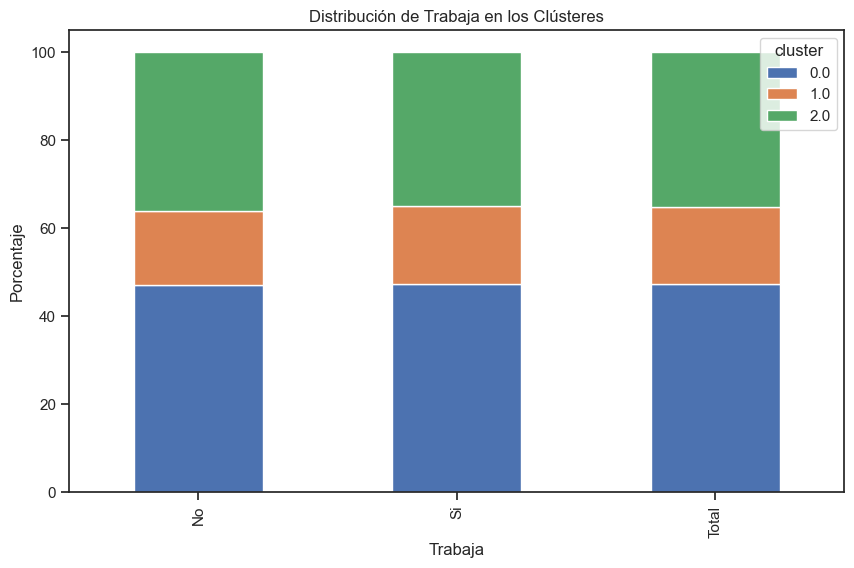


Composición de Clústeres para condact:
cluster     0.0  1.0   2.0  Total
condact                          
Aspirante   121   40    92    253
Cesante     424  157   321    902
Ocupado    1946  732  1440   4118
Total      2491  929  1853   5273



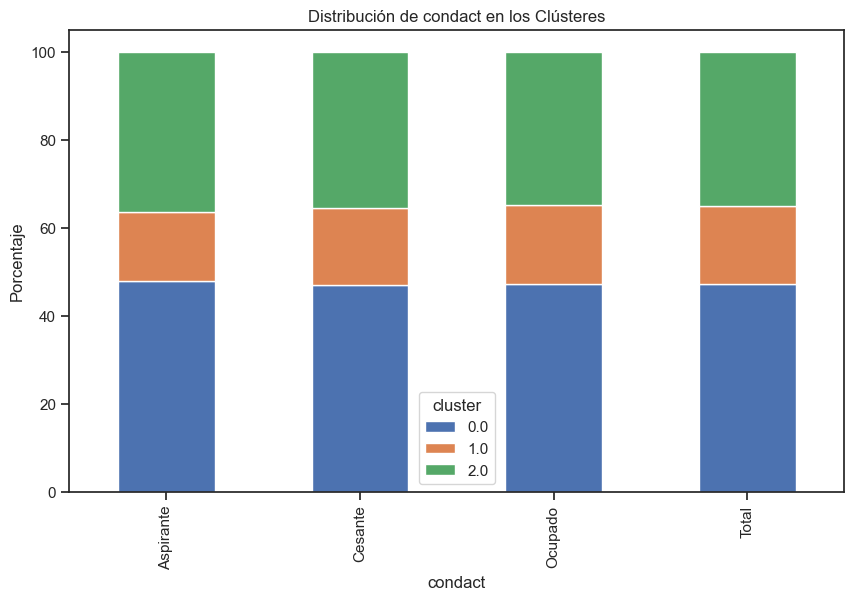

In [114]:
# Crear un DataFrame con las variables categóricas y la información del clúster
cluster_info = pd.concat([df_original[categorical_vars], combined_data_imputed['cluster']], axis=1)

# Analizar la composición de clústeres con respecto a variables categóricas
for var in categorical_vars:
    cross_tab = pd.crosstab(cluster_info[var], cluster_info['cluster'], margins=True, margins_name='Total')
    print(f"\nComposición de Clústeres para {var}:\n{cross_tab}\n")

    # Graficar barras apiladas
    cross_tab_percentage = cross_tab.div(cross_tab['Total'], axis=0) * 100
    cross_tab_percentage.drop('Total', axis=1, inplace=True)
    cross_tab_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Distribución de {var} en los Clústeres')
    plt.xlabel(var)
    plt.ylabel('Porcentaje')
    plt.show()


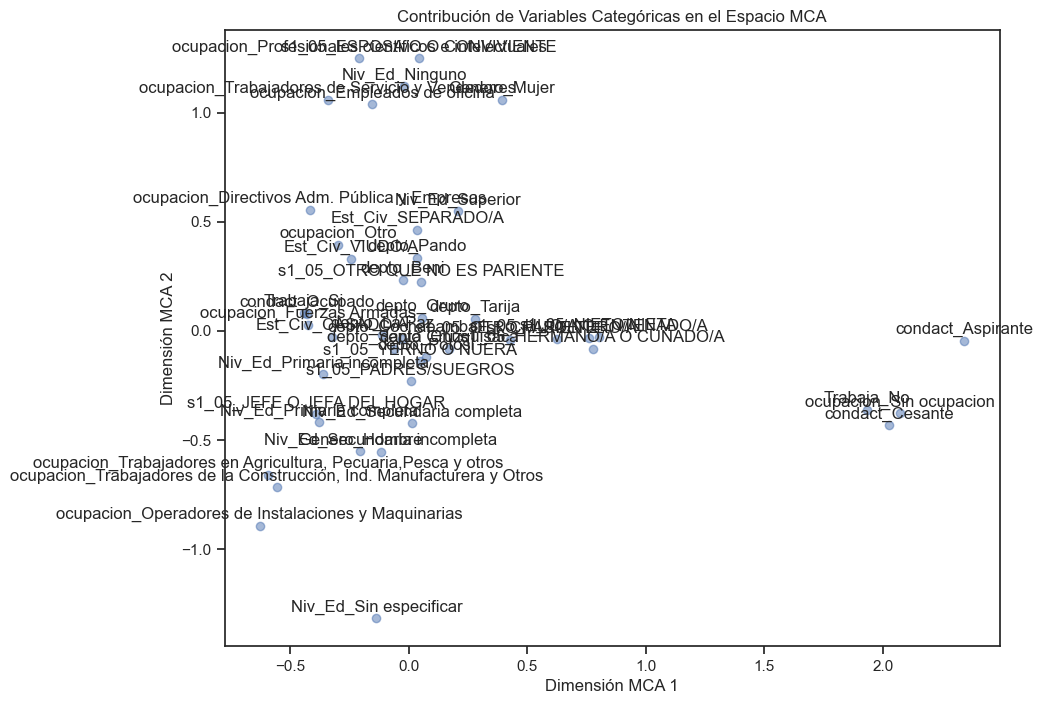

In [115]:
# Obtén las coordenadas de las categorías en las dimensiones MCA
category_coordinates = mca.column_coordinates(df_original[categorical_vars])

# Visualiza la contribución de las variables categóricas en el espacio MCA
plt.figure(figsize=(10, 8))
plt.scatter(category_coordinates.iloc[:, 0], category_coordinates.iloc[:, 1], alpha=0.5)
plt.title('Contribución de Variables Categóricas en el Espacio MCA')
plt.xlabel('Dimensión MCA 1')
plt.ylabel('Dimensión MCA 2')
for category, (x, y) in category_coordinates.iterrows():
    plt.annotate(category, (x, y), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()


In [116]:
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, v_measure_score
from sklearn.preprocessing import LabelEncoder

# Codifica las etiquetas categóricas si es necesario
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(combined_data_imputed['cluster'])

# Inercia (menor es mejor)
inertia = kmeans.inertia_
print(f"Inercia: {inertia}")

# Puntuación de silueta (mayor es mejor)
silhouette_avg = silhouette_score(combined_data_imputed[cluster_columns], combined_data_imputed['cluster'])
print(f"Puntuación de silueta: {silhouette_avg}")

# Completitud, homogeneidad y puntuación V (mayor es mejor)
completeness = completeness_score(true_labels, combined_data_imputed['cluster'])
homogeneity = homogeneity_score(true_labels, combined_data_imputed['cluster'])
v_measure = v_measure_score(true_labels, combined_data_imputed['cluster'])

print(f"Completitud: {completeness}")
print(f"Homogeneidad: {homogeneity}")
print(f"Puntuación V: {v_measure}")


Inercia: 3008.0786811893104
Puntuación de silueta: 0.5982960017806601
Completitud: 1.0
Homogeneidad: 1.0
Puntuación V: 1.0


In [117]:
import scipy.stats as stats

# Lista de variables categóricas
categorical_variables = ['depto', 'peao', 'Genero', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
                          'condact', 'Segundo_Trab', 'Aporta_Hog', 'pagos_extra', 'ingresos_categoria',
                          'tiempo_trab_categoria', 'phrs_categoria', 'Nacionalidad']

# Realizar la prueba de chi-cuadrado para cada variable
for variable in categorical_variables:
    # Verificar si la variable está presente en el DataFrame
    if variable in df_1.columns:
        # Obtener los datos
        data = df_1[variable]

        # Realizar la prueba de chi-cuadrado con corrección
        obs = data.value_counts().sort_values(ascending=False)  # Obtener las frecuencias observadas
        chi2, p, dof, expected = stats.chi2_contingency(obs + 0.5)

        # Imprimir los resultados
        print(f"Variable: {variable}")
        print(f"Estadístico de chi-cuadrado: {chi2}")
        print(f"Valor p: {p}")
        print("\n")
    else:
        print(f"La variable '{variable}' no está presente en el DataFrame.")


Variable: depto
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: peao
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Genero
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: s1_05
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Niv_Ed
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Est_Civ
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ocupacion
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Trabaja
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Cont_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: condact
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Segundo_Trab
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: Aporta_Hog
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: pagos_extra
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: ingresos_categoria
Estadístico de chi-cuadrado: 0.0
Valor p: 1.0


Variable: tiempo_trab_categoria
Estadístico de chi-cuadrad

In [118]:

columns_to_drop = ["Nacionalidad", 'Segundo_Trab', 'pagos_extra', 'ingresos', 'tiempo_trab_meses', 'phrs']
df_1 = df_1.drop(columns=columns_to_drop)


In [119]:
df_1.columns


Index(['gestion', 'trimestre', 'id_persona', 'depto', 'peao', 'Genero', 'Edad',
       's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'Cont_Trab',
       'condact', 'Aporta_Hog', 'tasa_desempleo', 'ingresos_categoria',
       'tiempo_trab_categoria', 'phrs_categoria'],
      dtype='object')

## Transformacion One hot encoding

In [120]:
import pandas as pd

categorical_columns = ['peao','depto', 'Genero', 'Cont_Trab', 's1_05', 'Niv_Ed', 'Est_Civ', 'ocupacion', 'Trabaja', 'condact', 'Aporta_Hog', 'ingresos_categoria','tiempo_trab_categoria','phrs_categoria']
       

# Aplicar One-Hot Encoding a las variables categóricas
df_enc = pd.get_dummies(df_1, columns=categorical_columns, drop_first=True)

# Asegurarse de manejar correctamente las variables objetivo
X_enc = df_enc.drop('tasa_desempleo', axis=1)
y_enc = df_enc['tasa_desempleo']

# Continuar con el entrenamiento del modelo utilizando X_enc y y_enc

df_enc.head()

,gestion,trimestre,id_persona,Edad,tasa_desempleo,peao_Si,depto_Chuquisaca,depto_Cochabamba,depto_La Paz,depto_Oruro,...,Aporta_Hog_Si,ingresos_categoria_Bajo,ingresos_categoria_Medio,ingresos_categoria_Alto,tiempo_trab_categoria_Corto,tiempo_trab_categoria_Medio,tiempo_trab_categoria_Largo,phrs_categoria_Parcial,phrs_categoria_Completo,phrs_categoria_Extra
9,2016,2,407473,23.0,4.52,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,True
12,2016,2,407481,21.0,4.52,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,2016,2,407536,22.0,4.52,True,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
31,2016,2,407546,23.0,4.52,True,False,False,False,True,...,True,False,True,False,False,False,True,True,False,False
33,2016,2,407550,34.0,4.52,True,False,False,False,True,...,True,True,False,False,False,False,True,True,False,False


In [121]:
# Guardar el DataFrame en un archivo CSV
df_enc.to_csv('df_2t_encoded.csv', index=False)
 # El parámetro index=False evita que se escriba el índice en el archivo.

In [122]:
dimensiones =df_enc.shape
# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 29082
Número de columnas: 55
